# KC HOUSE SALE DATA REGRESSION ANALYSIS

<font size="4">IMPORT DATA WRANGLING LIBRARIES</font>

In [142]:
## Import data wrangling libraries
import warnings
warnings.filterwarnings("ignore", message="Automatic reindexing on DataFrame vs Series comparisons is deprecated")
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import random as rnd
from numpy.linalg import eig

<font size="4"> VISUALIZATION LIBRARIES 

</font>

<font size="3">
    
I have included several visualizations using the Bokeh interactive library. To view these charts and interact with them, it is necessary to run the Jupyter Notebook. However, I have also included static visualizations using libraries such as Seaborn and Matplotlib, which are readily visible without running any code. These visualizations provide a comprehensive overview of the data, allowing for a deeper understanding of the patterns, relationships, and insights derived from the analysis.
</font>

In [143]:
## Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib.pyplot import MultipleLocator

In [144]:
## import interactive Bokeh libraries
from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import show
import pandas_bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.plotting import figure, output_file, show
from bokeh.models.widgets import DataTable, TableColumn
pandas_bokeh.output_notebook()
from bokeh.plotting import output_file, show
from bokeh.colors import RGB

Loading BokehJS ...

<font size="4">IMPORT MACHINE LEARINING MODELS</font>

In [145]:
## import machine learning model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


<font size="4">IMPORT PREPROCESSING AND EVALUATION LIBRARIES</font>

In [146]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.decomposition import PCA
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

<font size="4">LOADING DATA</font>

In [147]:
## Lodining data into pandas dataframe

data = pd.read_csv("data/kc_house_data.csv") # kc_data set from kaggle 
data = data.iloc[:,0:len(data)]# data retrieval
pd.set_option('display.max_columns', 25) # display 25 columns
pd.set_option('display.max_rows', 10) # display 10 rows
pd.set_option('display.width', 1000) # display 1000 charectors

# EXPLORATORY ANALYSIS

In [148]:
data.info() # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<font size="3">The dataset contain 21 columns with 21613 rows as shown above. There are 5 float64, 15 int64 and 1 objects data type exists. No missing data found </font>

In [149]:

print('Shape of the dataset:', data.shape) ## get the shape of the train data


Shape of the dataset: (21613, 21)


 <font size="3">INSPECTION OF MISSING DATA </font>

In [150]:
## Check for missing values
missing = data.isnull().sum().sort_values(ascending = False)# total missing values in each column arrange by largest
x1 = data.isnull().sum()/data.isnull().count()*100 # sum of null values/total rows * 100 (percentage)
x2 = (round(x1,2)).sort_values(ascending = False) # round the missing values to 2 decimalplaces

missing_data = pd.concat([missing, x2],axis = 1, keys = ['Total','%']) # concat using pandas and assign key for both values
missing_data.head(15)

,Total,%
id,0,0.00
grade,0,0.00
sqft_living15,0,0.00
long,0,0.00
lat,0,0.00
...,...,...
condition,0,0.00
date,0,0.00
view,0,0.00
waterfront,0,0.00


<font size="3">No missing values</font>

In [151]:
## Check column values
data.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [152]:
## Checking duplicate entries
duplicate = data[data.duplicated('id')] 

duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.00,3,1.50,1580,5000,1.00,0,0,3,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
314,4139480200,20141209T000000,1400000.00,4,3.25,4290,12103,1.00,0,3,3,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
325,7520000520,20150311T000000,240500.00,2,1.00,1240,12092,1.00,0,0,3,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
346,3969300030,20141229T000000,239900.00,4,1.00,1000,7134,1.00,0,0,3,6,1000,0,1943,0,98178,47.49,-122.24,1020,7138
372,2231500030,20150324T000000,530000.00,4,2.25,2180,10754,1.00,0,0,5,7,1100,1080,1954,0,98133,47.77,-122.34,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.00,4,3.50,2910,5260,2.00,0,0,3,9,2910,0,2012,0,98065,47.52,-121.88,2910,5260
20613,2724049222,20141201T000000,220000.00,2,2.50,1000,1092,2.00,0,0,3,7,990,10,2004,0,98118,47.54,-122.27,1330,1466
20670,8564860270,20150330T000000,502000.00,4,2.50,2680,5539,2.00,0,0,3,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20780,6300000226,20150504T000000,380000.00,4,1.00,1200,2171,1.50,0,0,3,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598


<font size="3">There are 177 rows with duplicate values and dropped them</font>

In [153]:
## Drop duplicate entries from the dataset

data = data.drop_duplicates(subset='id')
print(data.shape)

(21436, 21)


In [154]:
## Checking duplicate entries
duplicate = data[data.duplicated('id')] 
duplicate.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [155]:
##  get top 5 rows of dataset

data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [156]:
##  get bottom 5 rows of dataset
data.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,20141015T000000,325000.00,2,0.75,1020,1076,2.00,0,0,3,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


<font size="3">
DESCRIPTIVE STATISTICAL ANALYSIS
</font>

In [157]:
## Describe data
pd.set_option('display.float_format', '{:.2f}'.format) # set to display 2 decimal places.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00
mean,4580765328.18,540529.29,3.37,2.12,2082.70,15135.64,1.50,0.01,0.24,3.41,7.66,1790.96,291.74,1971.10,84.73,98077.86,47.56,-122.21,1988.31,12785.96
std,2876589633.67,367689.30,0.93,0.77,919.15,41538.62,0.54,0.09,0.77,0.65,1.17,829.03,442.78,29.39,402.43,53.47,0.14,0.14,685.70,27375.47
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123700078.75,322150.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1200.00,0.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904921185.00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308675062.50,645000.00,4.00,2.50,2550.00,10696.25,2.00,0.00,0.00,4.00,8.00,2220.00,560.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10087.25
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<font size="3">
    
The average price is 540,529 with a standard deviation of 367,689. The range of prices appears to be quite wide, spanning from 75,000 to 7,700,000. The statistical information for the predictors is displayed above.
    

</font>

In [158]:
## check value counts in waterfront feature
data.groupby(['waterfront'])['waterfront'].count()

waterfront
0    21273
1      163
Name: waterfront, dtype: int64

<font size="3">
    
 There are 163 flats with a waterfront and 21,273 flats without a waterfront.
    
</font>

In [159]:
data.groupby(['waterfront'])['price'].mean()

waterfront
0    531937.20
1   1661876.02
Name: price, dtype: float64

<font size="3">
    
The mean price for waterfront houses is significantly higher than non-waterfront houses, it suggests that waterfront properties tend to have higher prices on average. 
    
</font>

In [160]:
## Counting the number of bedrooms 
data['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
      ... 
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, Length: 13, dtype: int64

In [161]:
## Counting the number of bedrooms 
data.groupby(['bedrooms'])['price'].mean()

bedrooms
0     409503.85
1     317680.59
2     400925.49
3     466482.55
4     635648.62
        ...    
8    1105076.92
9     893999.83
10    819333.33
11    520000.00
33    640000.00
Name: price, Length: 13, dtype: float64

<font size="3">
    
Convert the date attribute to date time format 
    

</font>

In [162]:
## check floor value count
data['floors'].value_counts()


1.00    10559
2.00     8209
1.50     1888
3.00      611
2.50      161
3.50        8
Name: floors, dtype: int64

In [163]:
## Counting the numbesr of view feature
data.groupby(['view'])['view'].count()

view
0    19320
1      331
2      962
3      507
4      316
Name: view, dtype: int64

In [164]:
## Counting the numbesr of yr-renovated feature
data.groupby(['yr_renovated'])['yr_renovated'].count()

yr_renovated
0       20526
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: yr_renovated, Length: 70, dtype: int64

<font size="3">
    
Features like 'view' and 'yr-renovated' having mojority of zero values. Let see any significance on predicting the price
</font>

In [165]:
## Transform to date format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21436, dtype: datetime64[ns]

## DATA VISUALIZATION

In [166]:
## Visualize the mean price line chart of houses over the period using interactive bokeh 

plt_date= data.groupby(['date'])['price'].mean() # extract price by date
labels = list(set(data['date']))

plt_date.plot_bokeh(kind="line",
                    title ="Mean house price over the period",
                    figsize =(1000,600),
                    xlabel = "Date",
                    ylabel="Price",
                    stacked = True,
                    color = 'orange')


Figure(id='5798', ...)

<font size="3">The heighest mean price recorded on Oct 2014</font>

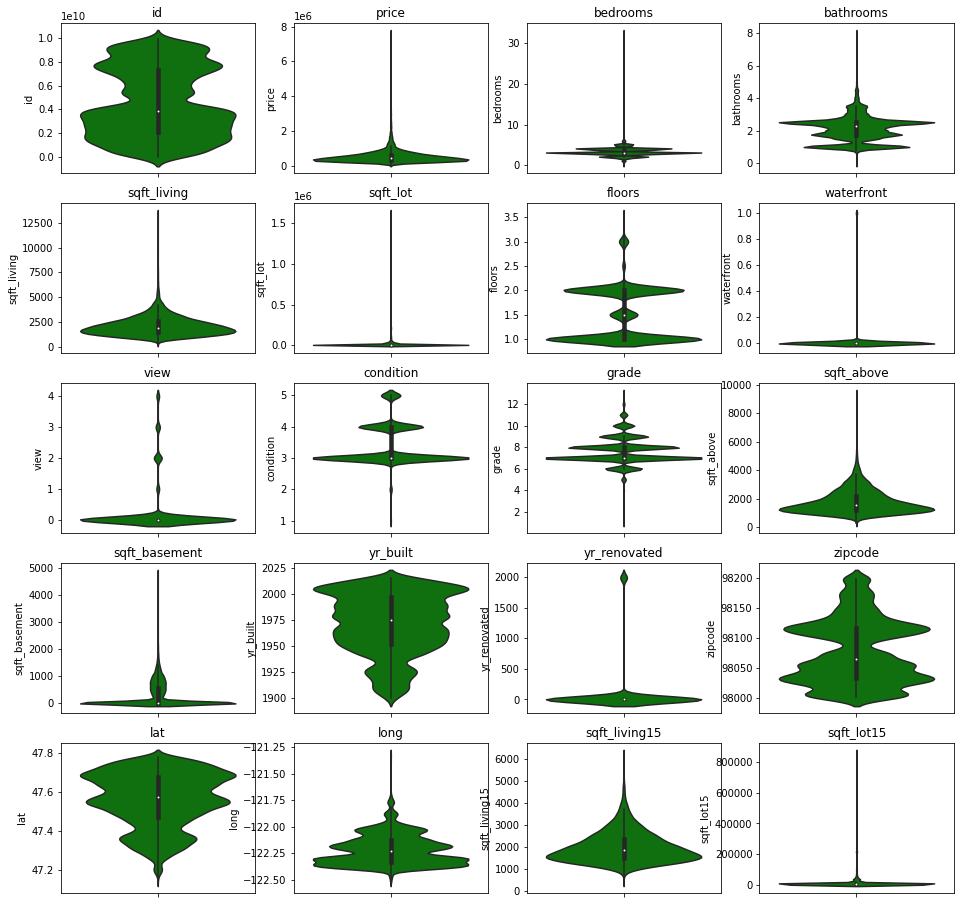

In [167]:
## Visualize in violin plot

numerical_features = data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(16, 16))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(5, 4, i + 1)  
    sns.violinplot(y =data[column], orient='v',color = 'green') 
    plt.title(column)  
plt.show()

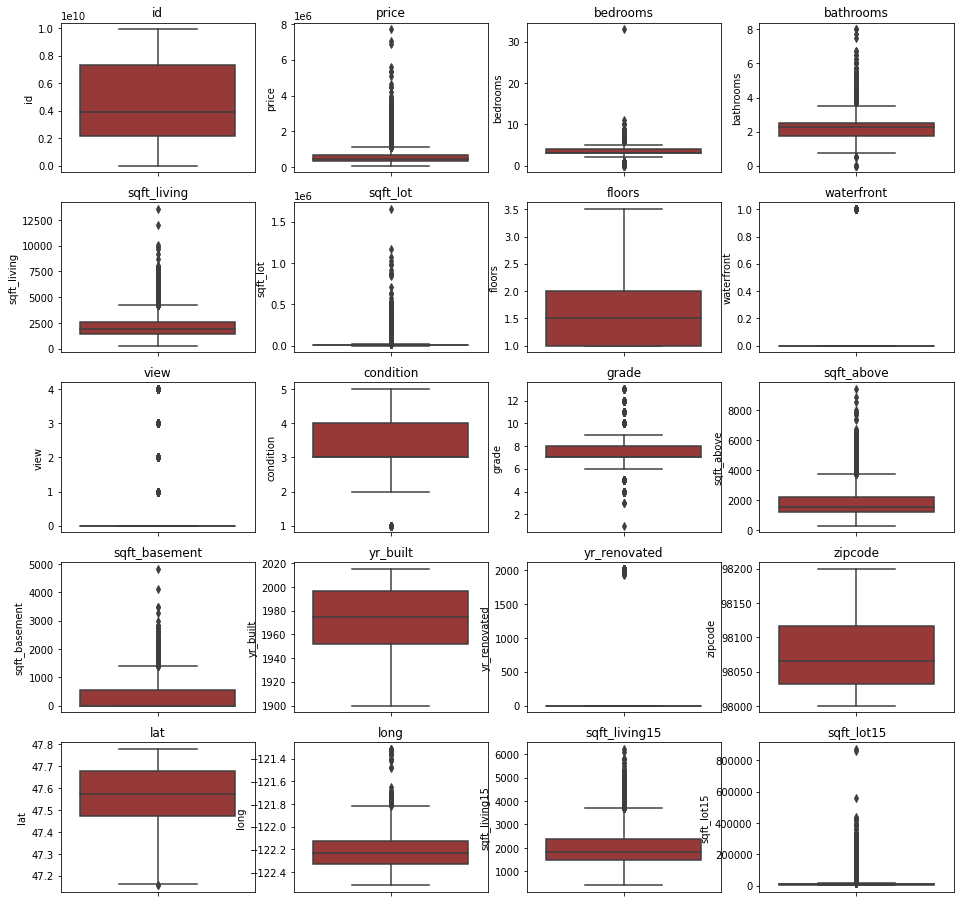

In [168]:
# Visualize in box plot
numerical_features = data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(16, 16))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(5, 4, i + 1)  
    sns.boxplot(y =data[column], orient='v',color = 'brown') 
    plt.title(column)  
plt.show()

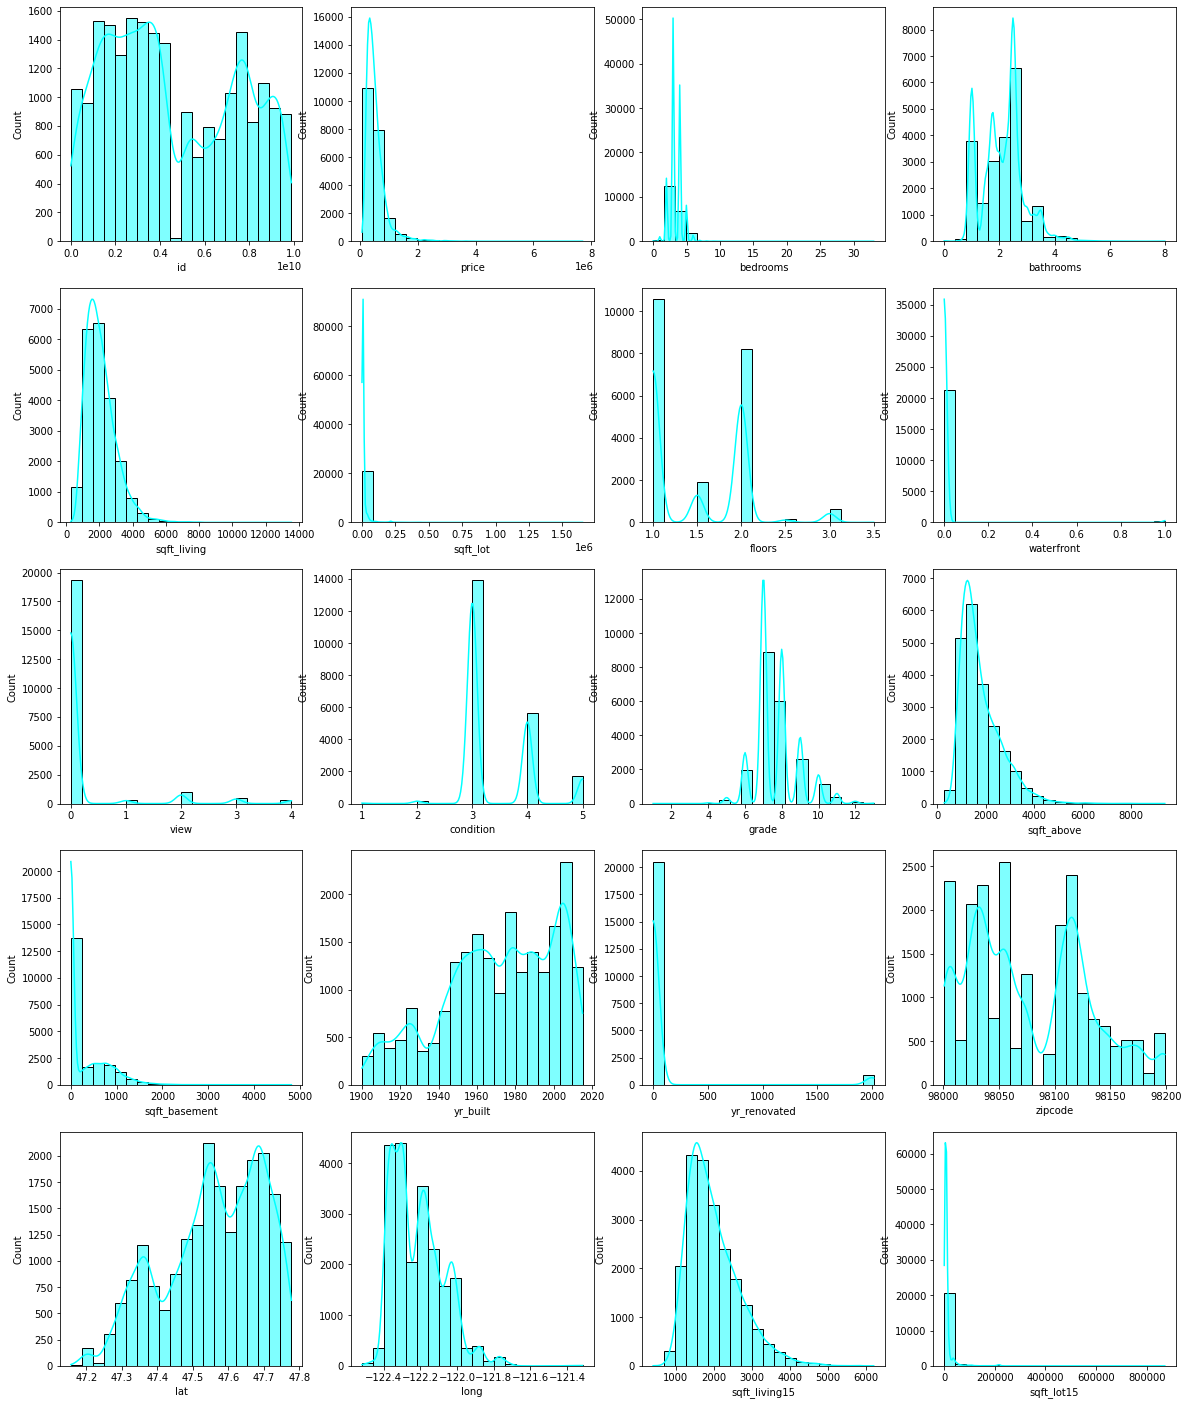

In [169]:
# Visualize in hist plot
numerical_features = data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(20, 25))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(5, 4, i + 1)  
    sns.histplot(data = data,x= column, color = 'aqua', bins=20, kde = True) 
    #plt.title(column)  
plt.show()

<font size="4">
    
Observations of key features:
    
Price Distribution: The distribution of prices is right-skewed, meaning that there is a longer tail on the right side of the distribution indicating higher-priced house.

Bedrooms Distribution: The distribution of bedrooms is approximately normal, suggesting that the number of bedrooms follows a typical bell-shaped curve.

Bathroom Frequencies: The distribution is approximately normal, indicating that there are more properties with a certain number of bathrooms and fewer properties with lower bathroom counts.

Sqft_living: The distribution of small area flats is concentrated around 2500 sqft, suggesting that a significant number of properties have an area close to that value.

Sqft_lot Size: The distribution of lot sizes (sqft_lot) is concentrated on the lower side, indicating that a majority of properties have smaller lot sizes.

Floors Distribution: The distribution of the number of floors appears to be discrete, with 1 and 2 story houses being the most common, indicating that single-story and two-story houses are predominant in the dataset.

View and Condition: Both view and condition variables exhibit discrete distributions, indicating that there are a limited number of distinct categories for these features.

    
    

    
</font>

In [170]:
## Chart of waterfront vs price in bokeh library

plt_w = data.groupby(['waterfront'])['price'].mean()# data extraction, price by waterfront class

## Assign RGB color
red = 200
green = 150
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_w.plot_bokeh(kind="bar",
                 title="Mean house price group by waterfront class",
                 figsize=(800, 500),
                 xlabel="Waterfront",
                 ylabel="Price",
                 #stacked=True,
                 color = color)

Figure(id='6031', ...)

<font size="3">
    
The mean price for waterfront houses is significantly higher than non-waterfront houses, it suggests that waterfront properties tend to have higher prices on average. 
    
</font>

In [171]:
## Chart of price with number of bedrooms and waterfront in bokeh intractive library.

plt_p = data.groupby(['bedrooms','waterfront'])['price'].mean().unstack() # data extraction, bedrooms and waterfront
plt_p.plot_bokeh(kind="bar",
                 title="Mean house price group by number of bedrooms and waterfront",
                 figsize=(800, 500),
                 xlabel="Bedrooms",
                 ylabel="Price",
                 stacked=False)


Figure(id='6196', ...)

<font size="3">
    
The mean price for 8-bedroom houses is significantly higher compared to houses with smaller or larger numbers of bedrooms. However, it is important to note that the mean price is influenced by various factors, and the number of bedrooms alone may not be the sole determinant of the price.
    
</font>

In [172]:
## Chart of floor vs price in bokeh library

plt_f = data.groupby(['floors'])['price'].mean() # extraxt floor and price details

##  Assogn RGB color
red = 300
green = 100
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_f.plot_bokeh(kind="line",
                 title="Mean house price base on floors",
                 figsize=(800, 500),
                 xlabel="Floors",
                 ylabel="Price",
                 #stacked=True,
                 color = color)

Figure(id='6352', ...)

<font size="3">
    
The mean price of houses with 2.5 floors appears to be higher compared to houses with a different number of floors.
    
There is a positive trend observed in the relationship between the number of floors and the mean price of houses. As the number of floors increases up to 2.5, the mean price tends to increase as well. However, this positive trend declines when the number of floors reaches 3, as the mean price starts to decrease. Interestingly, the mean price then climbs again when the number of floors reaches 3.5
    
This indicates that there may be a non-linear relationship between the number of floors and the mean price. The trend initially suggests that additional floors up to 2.5 are valued and contribute to higher prices. However, beyond a certain point (at 3 floors), additional floors may not have the same positive impact on the mean price. The subsequent increase in the mean price at 3.5 floors suggests that there could be other factors influencing this particular range of the number of floors.
    
</font>

In [173]:
## Chart of floor and waterfront vs price in bokeh library

plt_fw = data.groupby(['floors','waterfront'])['price'].mean().unstack() # extraxt floor and price wiath waterfront details

plt_fw.plot_bokeh(kind="bar", 
                 title="Mean house price of floors with waterfront",
                 figsize=(800, 500),
                 xlabel="Floors",
                 ylabel="Price",
                 stacked=True,)

Figure(id='6542', ...)

<font size="3">
    
The mean price of houses with 2.5 floors appears to be higher compared to houses with a different number of floors. It is consistant whether it waterfront location or not.
   
</font>

In [174]:
## Chart of bathrooms vs price in bokeh library

plt_b = data.groupby(['bathrooms'])['price'].mean() # data extraction, price by bathrooms

## Assign RGB color
red = 200
green = 100
blue = 120
color = RGB(r = red,
            g = green,
            b = blue)

plt_b.plot_bokeh(kind="bar", 
                 title="Mean house price base on bathrooms",
                 figsize=(800, 500),
                 xlabel="Bathrooms",
                 ylabel="Price",
                 stacked=True,
                 color = color)

Figure(id='6752', ...)

<font size="3">
    
There is a positive trend in the relationship between the number of bathrooms and the mean price of houses up to 6.25 bathrooms. As the number of bathrooms increases within this range, the mean price tends to increase as well. However, once the number of bathrooms reaches 6.25, the mean price starts to drop, indicating a potential saturation point where additional bathrooms beyond this threshold may not contribute significantly to the price.

Interestingly, the subsequent trend appears to be non-linear, as the mean price experiences both increases and drops at different numbers of bathrooms. This suggests that there are other factors influencing the relationship between the number of bathrooms and the mean price.
    
</font>

In [175]:
## Line chart of sqft_living vs price in bokeh library

plt_s = data.groupby(['sqft_living',])['price'].mean()# data extraction, price by bathrooms

## Assign RGB color
red = 100
green = 200
blue = 180
color = RGB(r = red,
            g = green,
            b = blue)

plt_s.plot_bokeh(kind="line", 
                 title="Mean house price base on sqft_living",
                 figsize=(800, 500),
                 xlabel="Sqft_living",
                 ylabel="Price",
                 #stacked=True,
                 color = color)

Figure(id='6916', ...)

<font size="3">
    
Based on the line chart, it is evident that there is an increasing trend in the price as the square footage of living space (sqft_living) increases. However, an interesting observation is that once the sqft_living reaches 12,000, there is a significant drop in the price.
    
</font>

<font size="3">
    
In addition to the relationship between price and sqft_living, it is important to consider the correlations between other features and the price as well. To gain a more insights of these relationships, it is recommended to examine the correlation matrix. The correlation matrix provides a quantitative measure of the correlations between predictors (such as bedrooms, bathrooms, floors, etc.) and the target variable (price).
</font>

In [176]:
## hbar chart of grade and bedrooms vs price in bokeh library

plt_g = data.groupby(['grade','bedrooms'])['price'].mean().unstack()# data extraction, price by grade and bedrooms

plt_g.plot_bokeh(kind="barh", 
                 title="Mean house price base on grade and bedrooms",
                 figsize=(800, 500),
                 xlabel="Price",
                 ylabel="Grade",
                 stacked=False,)
         

Figure(id='7132', ...)

<font size="3">
    
Based on the horrizontal bar chart, it is evident that there is an increasing trend in the price as the grade increases along with certain number of bedrooms. The heighest price combination was observed for 6 bedroom house with grade 13.
    
</font>

In [177]:
## point chart of lat and waterfront vs price in bokeh library

plt_g = data.groupby(['lat','waterfront'])['price'].mean().unstack()# data extraction, price by lat and waterfront

plt_g.plot_bokeh(kind="point",
                 title="Mean house price base on lat and waterfront",
                 figsize=(800, 500),
                 xlabel="Lat",
                 ylabel="Price",
                 stacked=False,)

Figure(id='7541', ...)

<font size="3">
    
Based on the point chart, the higher the latitude, hose price is high for waterfront location. Also observed slight price variations in other loations as well.
    
</font>

In [178]:
## Correlation matrix between features in table form
cormat = data.corr()#correlation matrix
round(cormat,2)
cormat.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.58,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.00,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.13,0.66,0.68,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode,-0.01,-0.05,-0.15,-0.20,-0.20,-0.13,-0.06,0.03,0.09,0.00,-0.18,-0.26,0.08,-0.35,0.06,1.00,0.27,-0.56,-0.28,-0.15
lat,-0.00,0.31,-0.01,0.02,0.05,-0.09,0.05,-0.01,0.01,-0.02,0.11,-0.00,0.11,-0.15,0.03,0.27,1.00,-0.14,0.05,-0.09
long,0.02,0.02,0.13,0.22,0.24,0.23,0.12,-0.04,-0.08,-0.11,0.20,0.34,-0.15,0.41,-0.07,-0.56,-0.14,1.00,0.33,0.25
sqft_living15,-0.00,0.58,0.39,0.57,0.76,0.14,0.28,0.09,0.28,-0.10,0.71,0.73,0.20,0.32,-0.00,-0.28,0.05,0.33,1.00,0.18


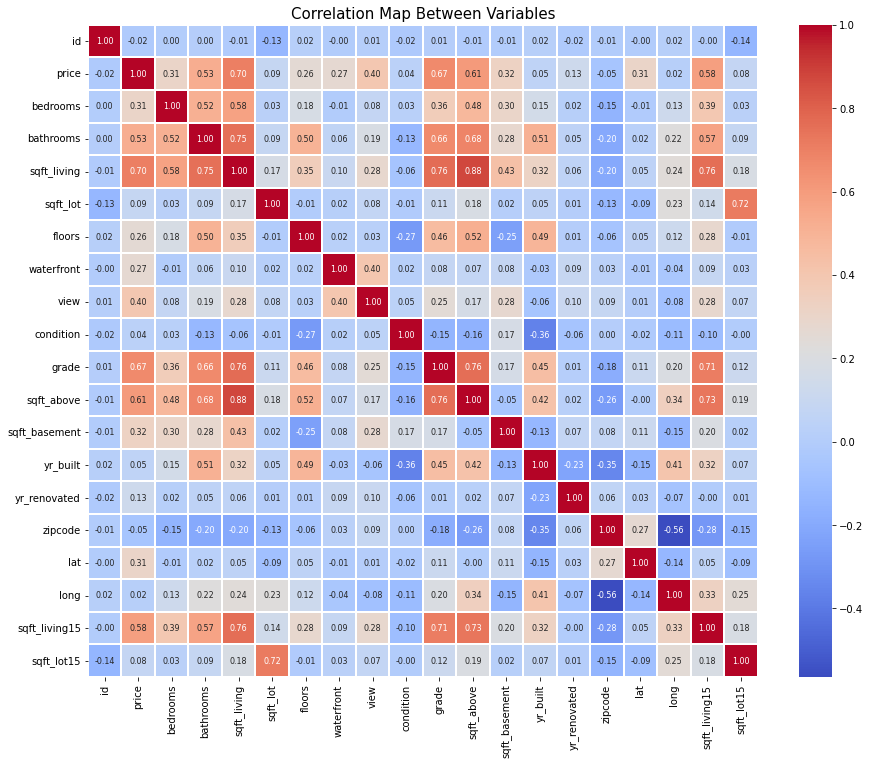

In [179]:
## To view correlations with heatmap

plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(method = 'pearson'), 
            annot = True, fmt = '.2f',
            linewidths = 0.1,
            linecolor= 'white',
             cmap='coolwarm',
            annot_kws={'size':8})
plt.title('Correlation Map Between Variables', fontsize = 15)
plt.show()

<font size="3">
    
Discussing the correlations +/- 0.5 and above
    
Sqft_lot15 exhibits a strong positive correlation with sqft_lot, indicating that as the size of the lot (sqft_lot) increases, the corresponding size of the lot for the nearest 15 neighbors (sqft_lot15) also tends to increase.

Sqft_living15 demonstrates moderate to strong positive correlations with bathrooms, sqft_living, grade, and sqft_above. This implies that as the living area (sqft_living15) increases, there is a tendency for the number of bathrooms, total living area, grade of the property, and the above-ground living area to increase as well.

Yr_built displays a moderate positive correlation with bathrooms, indicating that as the year of construction (yr_built) increases, there is a tendency for the number of bathrooms to increase as well.

Sqft_above exhibits moderate positive correlations with bathrooms, sqft_living, and floors. This suggests that as the above-ground living area (sqft_above) increases, there is a tendency for the number of bathrooms, total living area, and number of floors to increase as well.

Grade demonstrates strong positive correlations with bathrooms and sqft_living, indicating that as the grade of the property increases, there is a tendency for the number of bathrooms and total living area to increase as well.

Additionally, there are moderate correlations observed between bathrooms and bedrooms, suggesting that as the number of bathrooms increases, there is a tendency for the number of bedrooms to also increase.
    
I WILL CHECK THE HIGHLY CORRELATED PREDICTORS STATUS DURING SELECTION OF FEATURS PRIOR TO REGRESSION ANALYSIS.
    
    
</font>

<AxesSubplot:title={'center':'Pearson correlation coefficients between variables and price'}>

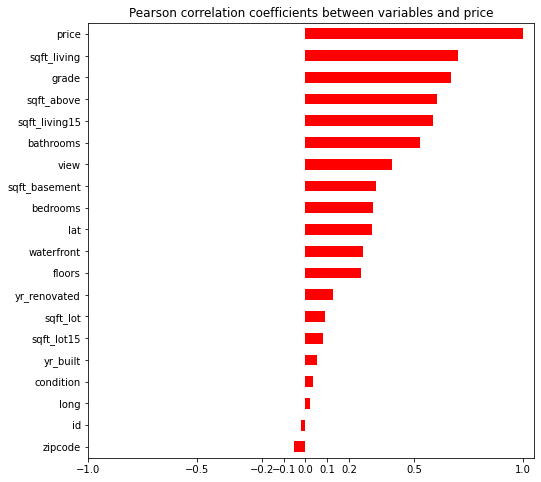

In [180]:
## Correlation of features with respect to the target price

df1 = cormat['price'] # target variable
df1_sorted = df1.sort_values() # sort the values

df1_sorted.plot(kind='barh',
                title='Pearson correlation coefficients between variables and price',
                color='red',
                figsize=(8, 8),
                xticks=(-1, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 1)) # range of x-values -1 to 1



<font size="3">
    
The resulting bar plot shows the Pearson correlation coefficients between each variable and the 'price' variable. Positive correlations are displayed on the right side of the plot, while negative correlations are shown on the left side. The length of the bars represents the strength of the correlation, with longer bars indicating a stronger correlation.
    
The analysis reveals that several variables show a significant positive correlation with the target variable, price. The variable with the highest positive correlation is sqft_living, followed by grade, sqft_above, sqft_living15, and others. This suggests that as the square footage of the living area increases, along with other factors such as the grade of the property and the above-ground living area, the price tends to rise as well.

On the other hand, the variables id, zipcode,long,condition,yr_built, sqft_lot15 and sqft_lot are not seem to have a notable impact on the target variable, price. These variables may not provide meaningful information or influence the pricing of houses in this dataset. I will leave them and will manage when selecting the right predictors process in coming sessions.
    
</font>

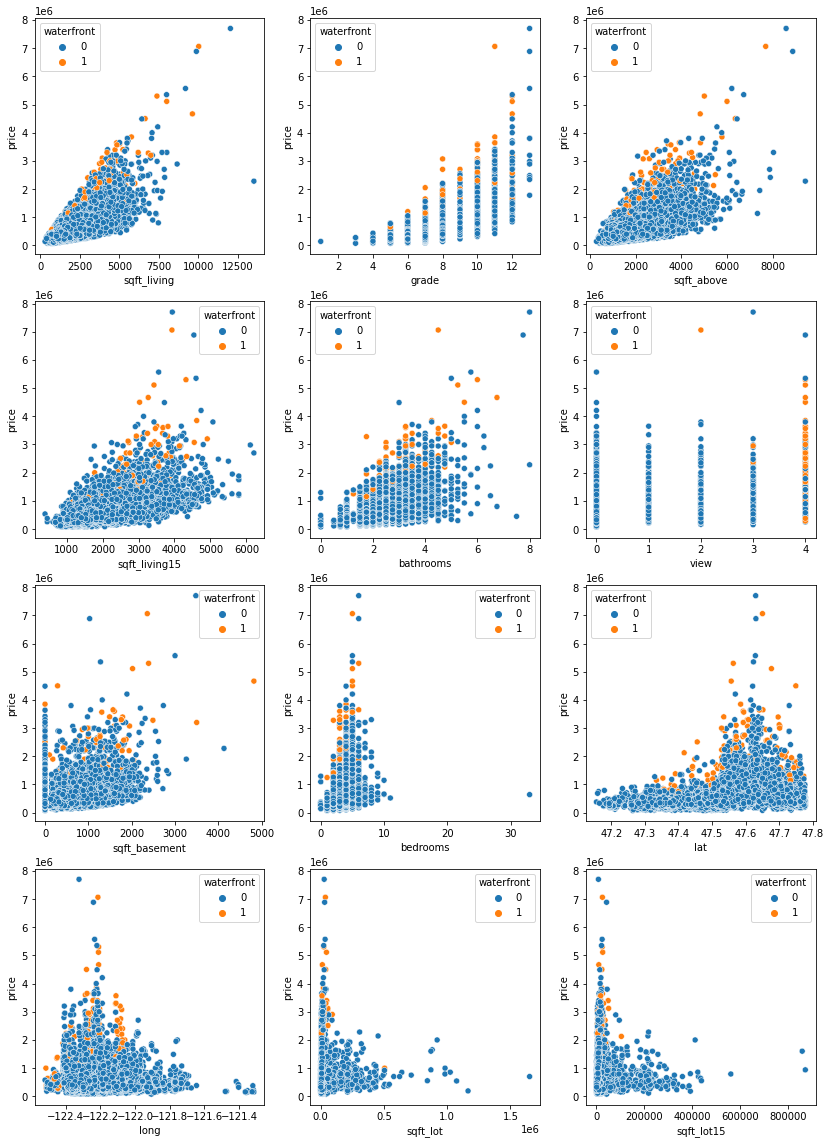

In [181]:
plt.figure(figsize=(14, 20))

def scatter(r,c,n,y):
    plt.subplot(r,c,n)
    sns.scatterplot(y = 'price',hue = 'waterfront', x = y, data=data)
    
scatter(4,3,1,'sqft_living')
scatter(4,3,2,'grade')
scatter(4,3,3,'sqft_above')
scatter(4,3,4,'sqft_living15')
scatter(4,3,5,'bathrooms')
scatter(4,3,6,'view')
scatter(4,3,7,'sqft_basement')
scatter(4,3,8,'bedrooms')
scatter(4,3,9,'lat')
scatter(4,3,10,'long')
scatter(4,3,11,'sqft_lot')
scatter(4,3,12,'sqft_lot15')
plt.show()


<font size="3">
    
The scatter plot visualizations of the major predictor variables, such as sqft_living, grade, sqft_above, sqft_living15, and bathrooms, further confirm the patterns and correlations observed in the previous analysis. By examining these scatter plots, we can validate the relationships between variables and the target variable, price which is variying with waterfront location.
    
</font>

In [182]:
## Drop the id and data
data.drop(['id', 'date'],axis=1, inplace =True)
data.shape

(21436, 19)


    
# DATA PREPROCESSING
    


<font size="3">
    
MANAGING OUTLIERS
    
</font>

In [183]:
## detecting outliers on upper and lower quantiles using the functions

def quantile_up(data1):
  
    Q1 = data1.quantile(0.25) #1st quantile - 25%
    Q3 = data1.quantile(0.75) #3rd quantile - 75%
    IQR = Q3 - Q1 #Interquantile range - IQR
    outlier_step = 1.5 * IQR
    upper_whisker = data1[data1<=Q3+1.5*IQR].max()
    return (upper_whisker)

def quantile_down(data2):
    
    Q1 = data2.quantile(0.25) #1st quantile - 25%
    Q3 = data2.quantile(0.75) #3rd quantile - 75%
    IQR = Q3 - Q1 #Interquantile range - IQR
    outlier_step = 1.5 * IQR
    lower_whisker = data2[data2>=Q1-1.5*IQR].min()
    return (lower_whisker)


<font size="3">
    
The upper and lower quantiles are determined by calculating the interquartile range (IQR) of each variable and adding or subtracting 1.5 times the IQR from the respective quartiles. This helps identify potential outliers in the data.
    
</font>

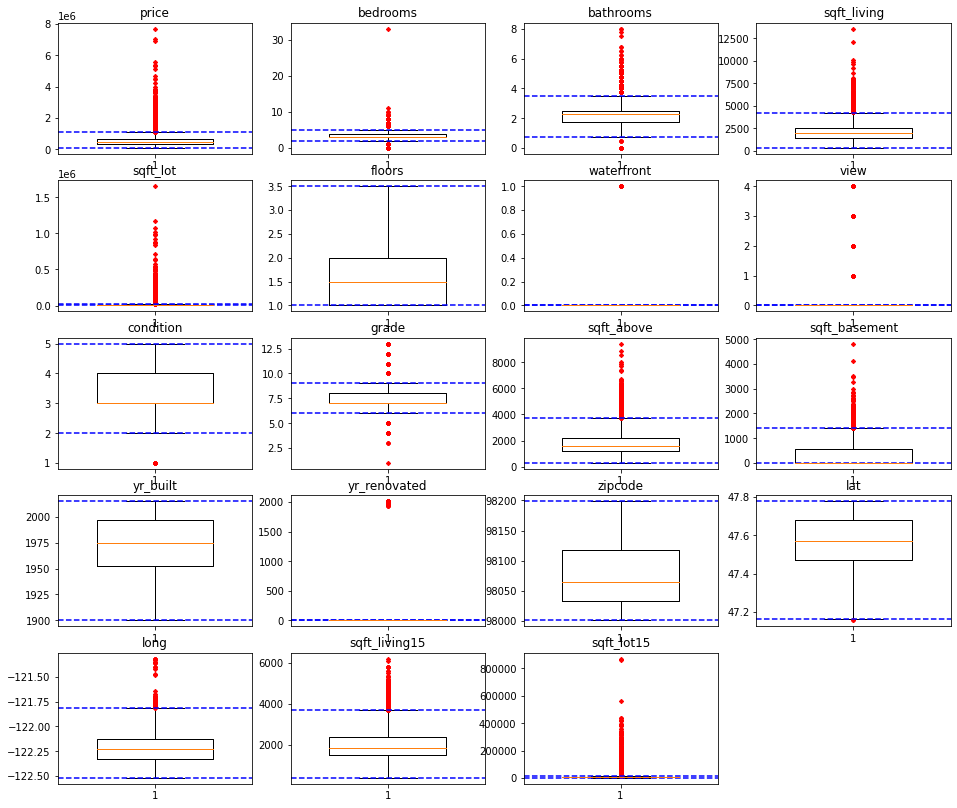

In [184]:
## Box plot to illustrate the outliers with IQR cutoff points

plt.figure(figsize=(16,14))
labels = list(set(data.columns)) # list of unique column from dataset
for x in range(19): # iterate over the range 0-18
    plt.subplot(5,4,x+1) # set plot 5 rows and 4 rows
    plt.boxplot(data.iloc[:,x], 
                whis = 1.5, 
                widths = 0.6, 
                flierprops = {'marker':'D', 
                              'markerfacecolor':'red', 
                              'markeredgecolor':'red', 
                              'markersize':3})
    
    plt.axhline(y = quantile_up(data.iloc[:,x]), color='b', linestyle='--')# draw horizontal dashed line upper border
    plt.axhline(y = quantile_down(data.iloc[:,x]), color='b', linestyle='--')# draw horizontal dashed line lower border
    plt.title(data.columns[x])
plt.show()

<font size="3">
    
The above plots highlights potential outliers by setting cutoff lines based on 1.5 times the IQR above and below the quartiles. Any data points that fall beyond these cutoff lines are considered outliers and are plotted as individual data points.
    
</font>

Remaining data: (14813, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14813 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14813 non-null  float64
 1   bedrooms       14813 non-null  int64  
 2   bathrooms      14813 non-null  float64
 3   sqft_living    14813 non-null  int64  
 4   sqft_lot       14813 non-null  int64  
 5   floors         14813 non-null  float64
 6   waterfront     14813 non-null  int64  
 7   view           14813 non-null  int64  
 8   condition      14813 non-null  int64  
 9   grade          14813 non-null  int64  
 10  sqft_above     14813 non-null  int64  
 11  sqft_basement  14813 non-null  int64  
 12  yr_built       14813 non-null  int64  
 13  yr_renovated   14813 non-null  int64  
 14  zipcode        14813 non-null  int64  
 15  lat            14813 non-null  float64
 16  long           14813 non-null  float64
 17  sqft_living15  14813 n

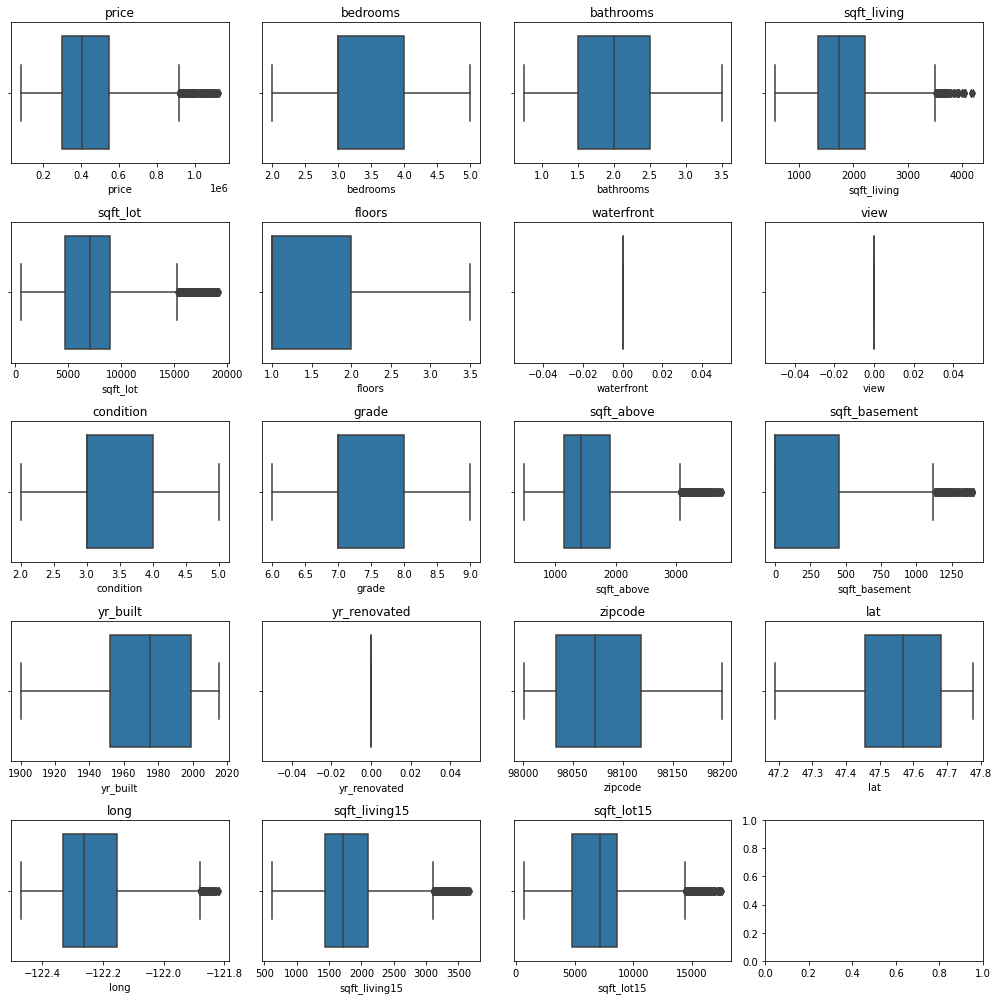

In [185]:
## Ploting the remaining data after removing the outliers

dfr = data.copy()
Q1 = dfr.quantile(0.25)#1st quantile - 25%
Q3 = dfr.quantile(0.75)#3rd quantile - 75%
IQR = Q3 - Q1 #Interquantile range - IQR
df_rem = dfr[~((dfr < (Q1 - 1.5 * IQR)) | \
               (dfr> (Q3 + 1.5 * IQR))).any(axis=1)]

print('Remaining data:',df_rem.shape)
df_rem.info()

# plot box and whisker plots after clearing outliers
fig, axes = plt.subplots(5, 4, figsize=(14, 14)) # 5 rows with 4 columns
axes = axes.flatten() # create an array to iterate 

for i, col in enumerate(df_rem.columns): # to iterate over the colums 
    sns.boxplot(x=df_rem[col], ax=axes[i])# plot boxplot 
    axes[i].set_title(col) # label

plt.tight_layout()
plt.show()


<font size="3">
    
After eliminating potential outliers, the dataset has been reduced to 13,457 rows and 17 columns. We have disregarded the three empty plots since a 5x4 matrix allows for 20 plots, but we are only utilizing 17 of them.
    
</font>

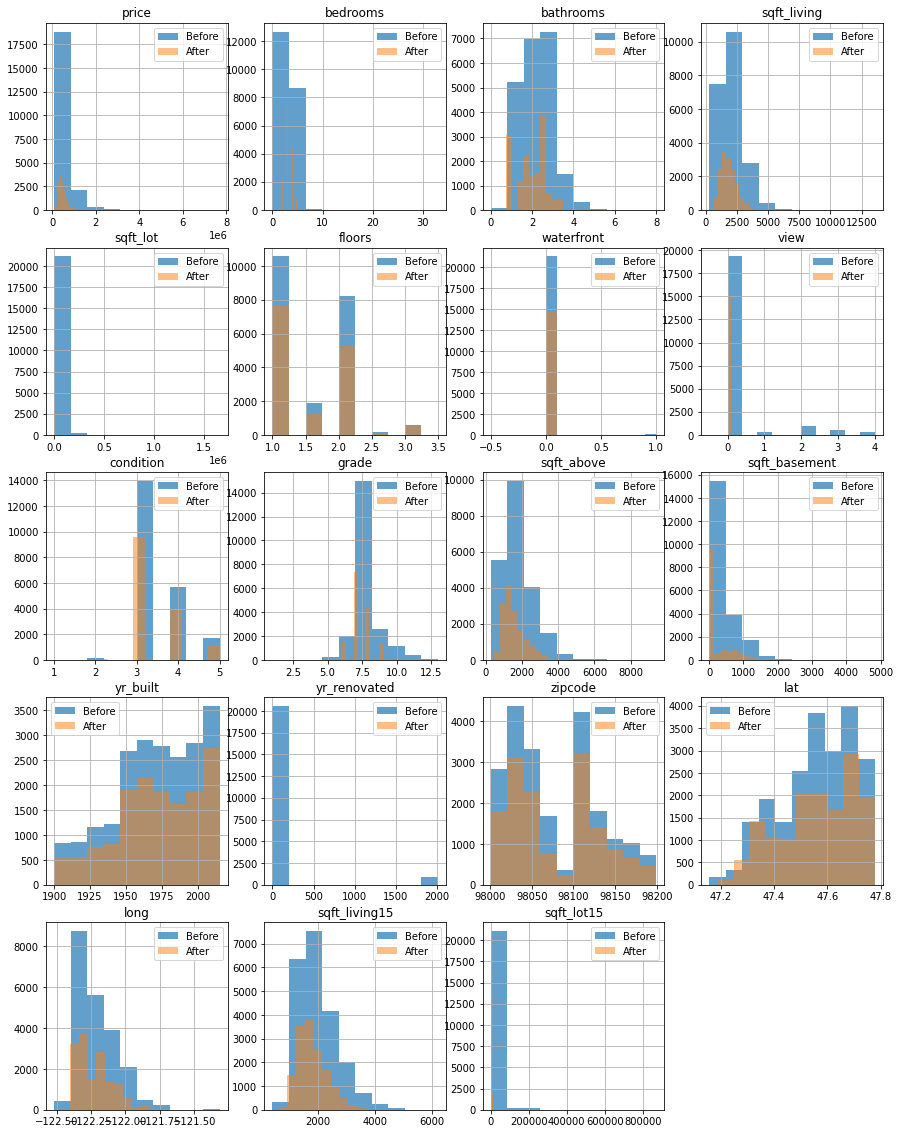

In [186]:
## Plot histogram before and after clearing outliers
plt.figure(figsize=(15,20))
for x in range(19): # iterate over range 0-18
    plt.subplot(5,4,x+1) # 3 rows and 4 columns
    data.iloc[:,x].hist(alpha = 0.7) # plot histogram of the values of x-column -before
    df_rem.iloc[:,x].hist(alpha = 0.5)# # plot histogram of the values of x-column - after
    plt.legend(['Before', 'After'])
    plt.title(df_rem.columns[x])
plt.show()


<font size="3">
    
The distributions of features before and after the removal of outliers exhibit notable changes. Following the removal of outliers, there is a decrease in the frequencies of data. Features such as sqft_living, bedrooms, bathrooms, and sqft_living15 etc. appear to be more concentrated or centered in their distributions.
    
</font>

In [187]:
## Check the remained data as data for further analysis. 
data = df_rem
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14813 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14813 non-null  float64
 1   bedrooms       14813 non-null  int64  
 2   bathrooms      14813 non-null  float64
 3   sqft_living    14813 non-null  int64  
 4   sqft_lot       14813 non-null  int64  
 5   floors         14813 non-null  float64
 6   waterfront     14813 non-null  int64  
 7   view           14813 non-null  int64  
 8   condition      14813 non-null  int64  
 9   grade          14813 non-null  int64  
 10  sqft_above     14813 non-null  int64  
 11  sqft_basement  14813 non-null  int64  
 12  yr_built       14813 non-null  int64  
 13  yr_renovated   14813 non-null  int64  
 14  zipcode        14813 non-null  int64  
 15  lat            14813 non-null  float64
 16  long           14813 non-null  float64
 17  sqft_living15  14813 non-null  int64  
 18  sqft_l

In [188]:
## Set the target variable as price

target = data['price']
target.shape


(14813,)

In [189]:
## Drop price from the data
data = data.copy() # created a copy of the data
data.drop('price', axis=1, inplace=True) # drop the price varaible
print(data.shape)

(14813, 18)


In [190]:
## Stadard Scaling of data
#from sklearn.preprocessing import StandardScaler

#features = list(data.select_dtypes(include=['int64', 'float64', 'int32']).columns) # select data type (numeric)
#data_scaler = StandardScaler() 
#data_scaled = pd.DataFrame(data = data) 
#data_scaled[features] = data_scaler.fit_transform(data_scaled[features]) # sacle the features and transformed

#print(np.mean(data), np.std(data))

<font size="3">
    
As shown above, the scaling process standardizes the data by adjusting it to have a mean of 0 and a standard deviation of 1. This standardization is beneficial for optimizing the utilization of machine learning algorithms and conducting statistical analyses more effectively.
    
</font>

In [191]:
data.head()# view scaled data head

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
2,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
6,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819


In [193]:
## Droped features with sigle zero values
data.drop(['waterfront','view','yr_renovated'],axis = 1, inplace =True)

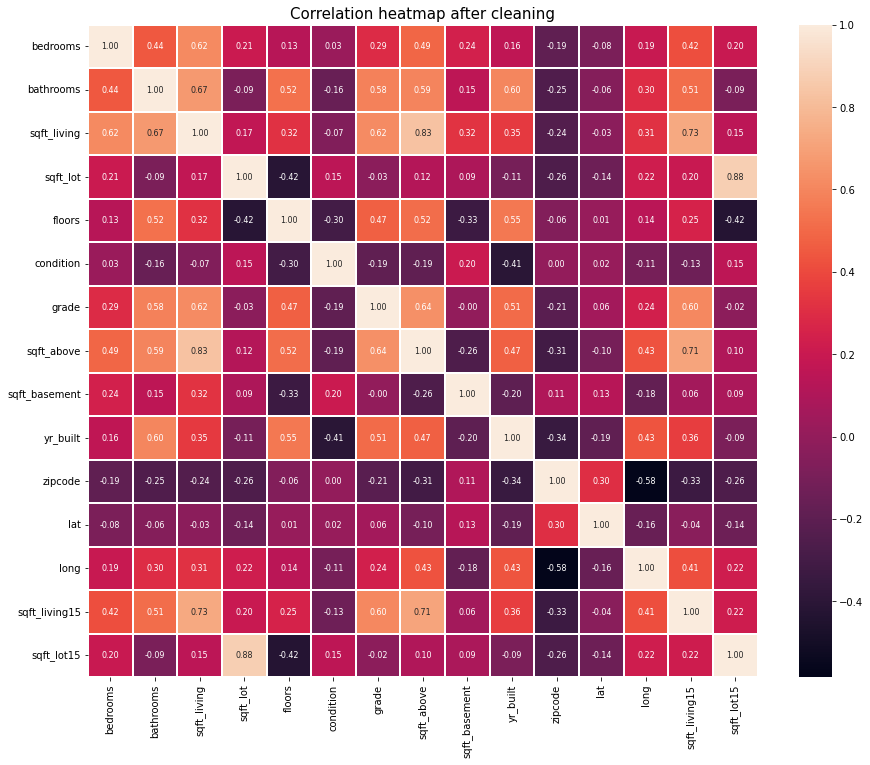

In [194]:
## Review the correlation heatmap after cleaning

plt.figure(figsize=(15, 12))

sns.heatmap(data.corr(method = 'pearson'), 
            annot = True, fmt = '.2f',
            linewidths = 0.1,
            linecolor= 'white',
            annot_kws={'size':8})
plt.title('Correlation heatmap after cleaning', fontsize = 15)
plt.show()

<font size="3">
    
The correlations among the predictors remain largely unchanged.
    
</font>

In [195]:
data.shape # check the data shape

(14813, 15)

In [196]:
# Check column name values
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

<font size="3">
    
PREPARING DATA FOR ANALYSIS WITH LEARNING ALGORITHAMS
    
Feature selection process
    
</font>

In [197]:
## Import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

## Assigning X as predictors and y as target as usual
X = data
y = target

selector = SelectKBest(score_func=f_regression, k='all') # f_regression to get feature scores
selector.fit(X, y) # fitting with selector

f_scores = selector.scores_ # get featur scores
f_names = X.columns # get featur names
f_scores_df = pd.DataFrame({'Feature': f_names, 'Score': f_scores}) # dataframe to store feature name and score
f_scores_df = f_scores_df.sort_values(by='Score', ascending=False)# sort the feature score 

df3 = f_scores_df.loc[:, ['Feature', 'Score']] # best feature and score dataframe
df3 # view 

,Feature,Score
6,grade,5740.69
2,sqft_living,5359.63
11,lat,4669.37
13,sqft_living15,3736.32
7,sqft_above,2987.01
...,...,...
5,condition,106.25
3,sqft_lot,105.43
12,long,35.51
9,yr_built,2.23


<AxesSubplot:xlabel='Feature'>

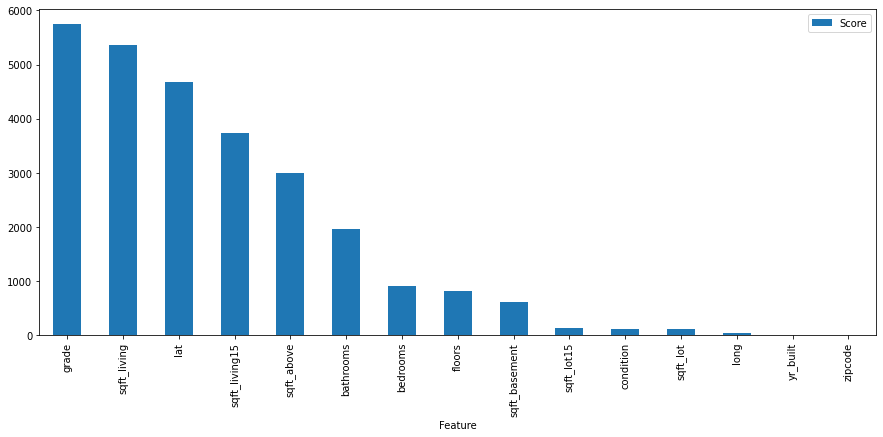

In [198]:
## Plot the best features with higher score

labels = list(set(df3['Feature']))
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
df3.plot.bar(x='Feature', y='Score', ax=ax)

#plt.show()

In [199]:
## Select the top features based on score
#from sklearn.feature_selection import SelectKBest, f_regression

#selector = SelectKBest(score_func=f_regression, k=13) # Select K Best feature selector
#X_selected = selector.fit_transform(X, y)  # Fit the selector 
#features_selected = X.columns[selector.get_support()] # selected features
#X_selected = pd.DataFrame(X_selected, columns=features_selected) # new dataframe with selected features

#X_selected # Use X_selected for further analysis and modeling

<font size="3">
    
After careful analysis, we have selected the top 13 features for further examination. However, we have decided to exclude "yr_built" and "zipcode" from consideration. These features were not deemed as influential or relevant in predicting the target variable and were therefore excluded from the analysis. By focusing on the remaining 13 features, we aim to refine our model and enhance its predictive capabilities.
    
</font>

In [200]:
#X_selected.columns # look the column name valus

In [201]:
#from sklearn.linear_model import Lasso
#from sklearn.model_selection import GridSearchCV

#lasso = Lasso()

# Define the alpha values to be searched
#param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
#param_grid = {'alpha': np.linspace(0.1, 1, 100)}

# Perform grid search with cross-validation
#grid_search = GridSearchCV(lasso, param_grid, cv=5)
#grid_search.fit(X, y)

#best_alpha = grid_search.best_params_['alpha']
#print("Best alpha:", best_alpha)

In [244]:
## feature selection 
#import libraries

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = data
y = target

lasso = Lasso(alpha=1000)  # set the alpha value as per your requirement
#lasso.fit(X, y)

#my_feature = SelectFromModel(lasso, prefit=True) # lasso feature selection 
#X_selected = my_feature.transform(X) # selected features based on lasso co efficients

#feature_id = my_feature.get_support(indices=True) # get the selected feature names 
#selected_f = X.columns[feature_id]

#X_selected = X[selected_f].copy()
#X_selected

#print("Selected Features:")
#print(selected_f)


In [245]:
# Check the inportance of each feature
import catboost as cb
cb = cb.CatBoostRegressor()
#cb.fit(data,target)

#importances = pd.DataFrame({'feature':data.columns,'importance':np.round(cb.feature_importances_,3)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(17)

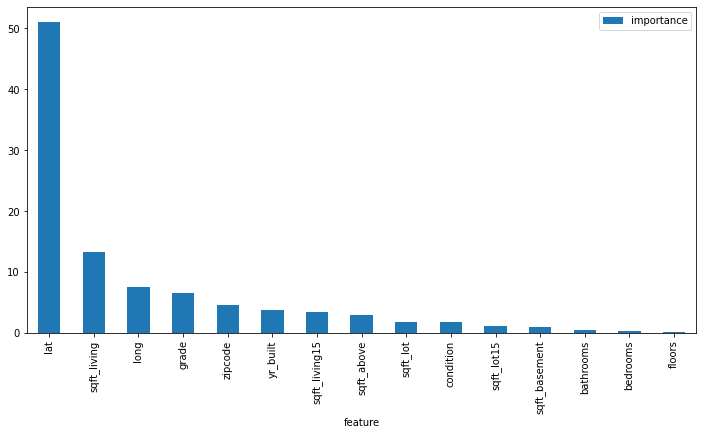

In [204]:
## Importances.plot.bar()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

importances.plot.bar(ax=ax)

plt.show()

In [205]:
data1= data[['sqft_living', 'sqft_lot','condition', 'grade', 'sqft_above',
            'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15','sqft_basement','zipcode']]

SelectBest and Lasso feature selection option will not yiled / minimize the mean square error. The catboost regressor options deemed to be minimizing the mean square error.

Therefore, I have selected the top 12 features for further examination. Also include "yr_built" and "zipcode" as it contributes the prediction of price. These features were not deemed as influential or relevant in predicting the target variable and were therefore excluded from the analysis. By focusing on the remaining 12 features, aim to refine our model and enhance its predictive capabilities.

In [246]:
# Check the inportance of each feature afterselection
import catboost as cb
cb = cb.CatBoostRegressor()
#cb.fit(data1,target)

#importances = pd.DataFrame({'feature':data1.columns,'importance':np.round(cb.feature_importances_,3)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(17)

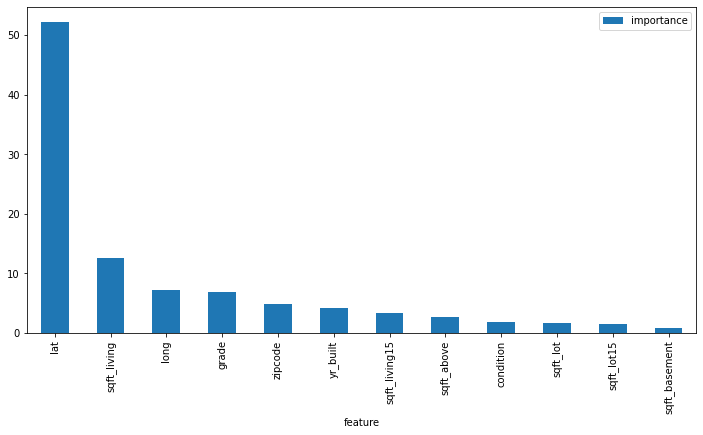

In [207]:
## Importances.plot.bar()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

importances.plot.bar(ax=ax)

plt.show()

In [208]:
## Preparing data for traing and testing by spliting

X = data1.values # get predictor variable values
y = target.values # get target variable values

## spliting dataset to 80/20 proportion for training and testing
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42) 

In [209]:
## check the shape of the split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11850, 12)
(11850,)
(2963, 12)
(2963,)


In [211]:
## Standardizing the feature to mean 0 and std 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [217]:
print("Scaled train data Mean:\n {:.1f}".format(np.mean(X_train)))
print("\nScaled train data Standard Deviation:\n {:.1f}".format(np.std(X_train)))
print("Scaled test data Mean:\n {:.1f}".format(np.mean(X_test)))
print("\nScaled test data Standard Deviation:\n {:.1f}".format(np.std(X_test)))



Scaled train data Mean:
 -0.0

Scaled train data Standard Deviation:
 1.0
Scaled test data Mean:
 -0.0

Scaled test data Standard Deviation:
 1.0



    
# BUILDING REGRESSION MODELS


In [218]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

lr_models =[]

lr_models.append(('Linear Regression',LinearRegression()))
lr_models.append(('Ridge',Ridge(alpha=0.1)))
lr_models.append(('Lasso',Lasso(alpha=0.8,max_iter=1000)))

## Evaluate each model in turn
results = []
names = []

for name, model in lr_models:
    fit = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print(name, "Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
    #print(name, "Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))
    
    r_squared_train = model.score(X_train, y_train) # compute R-sdquared value for train
    r_squared_test = model.score(X_test, y_test) # compute R-sdquared value for test
    rmse = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

    # Print the metrics
    print(name,"Train_R^2: {:.2f}%".format(r_squared_train * 100))
    print(name,"Test_R^2: {:.2f}%".format(r_squared_test * 100))
    print(name,"RMSE: {:.2f}".format(rmse))

## Cross validation
    kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
    cv_scores = cross_val_score(model,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

    # Print scores
    print(name,"Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
    print(name,"Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
    #print('slope:', np.round(model.coef_,2))
    #print('intercept:',np.round(model.intercept_,2))
    print()




Linear Regression Train_R^2: 65.22%
Linear Regression Test_R^2: 65.42%
Linear Regression RMSE: 106629.03
Linear Regression Mean cv Score: 65.01%
Linear Regression Standard Deviation of CV Scores: 0.011

Ridge Train_R^2: 65.23%
Ridge Test_R^2: 65.43%
Ridge RMSE: 106612.32
Ridge Mean cv Score: 65.03%
Ridge Standard Deviation of CV Scores: 0.011

Lasso Train_R^2: 65.23%
Lasso Test_R^2: 65.43%
Lasso RMSE: 106612.27
Lasso Mean cv Score: 65.03%
Lasso Standard Deviation of CV Scores: 0.011



<font size="3">

The linear, ridge, and lasso regression models did not meet the performance expectations in this analysis. Therefore, explore other regression algorithms for further analysis and improved results. By trying alternative regression models, we can potentially find a better fit for the data and enhance the predictive accuracy of the model.
    
</font>


<font size="3">

FIT WITH KNN MODEL
    
</font>

In [219]:
## 2 - Model KNN
model2 = KNeighborsRegressor(weights='uniform')
model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print("KNN_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("KNN_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_knn = model2.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_knn = model2.score(X_test, y_test) # compute R-sdquared value for test
rmse_knn = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_knn * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_knn * 100))
print("RMSE: {:.2f}".format(rmse_knn))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model2,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

KNN_Predictions: 416950, Actual Values: 431000
KNN_Predictions: 326202, Actual Values: 240000
Train_R^2: 86.12%
Test_R^2: 78.78%
RMSE: 83528.69
Mean cv Score: 78.15%
Standard Deviation of CV Scores: 0.014



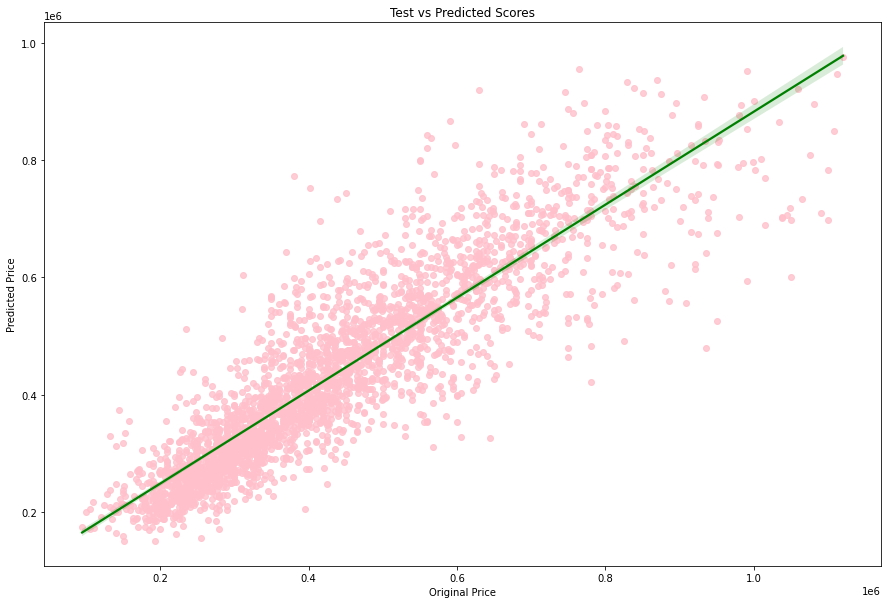

In [220]:
## plot the test, predicted score KNN
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'pink'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">

FIT WITH DECISION TREE
    
</font>


In [221]:
## 3 - Model Decision tree
model3 = DecisionTreeRegressor()
model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print("TREE_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("TREE_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_tree = model3.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_tree = model3.score(X_test, y_test) # compute R-sdquared value for test
rmse_tree = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_tree * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_tree * 100))
print("RMSE: {:.2f}".format(rmse_tree))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model3,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

TREE_Predictions: 270000, Actual Values: 431000
TREE_Predictions: 305000, Actual Values: 240000
Train_R^2: 100.00%
Test_R^2: 75.71%
RMSE: 89364.32
Mean cv Score: 73.81%
Standard Deviation of CV Scores: 0.016



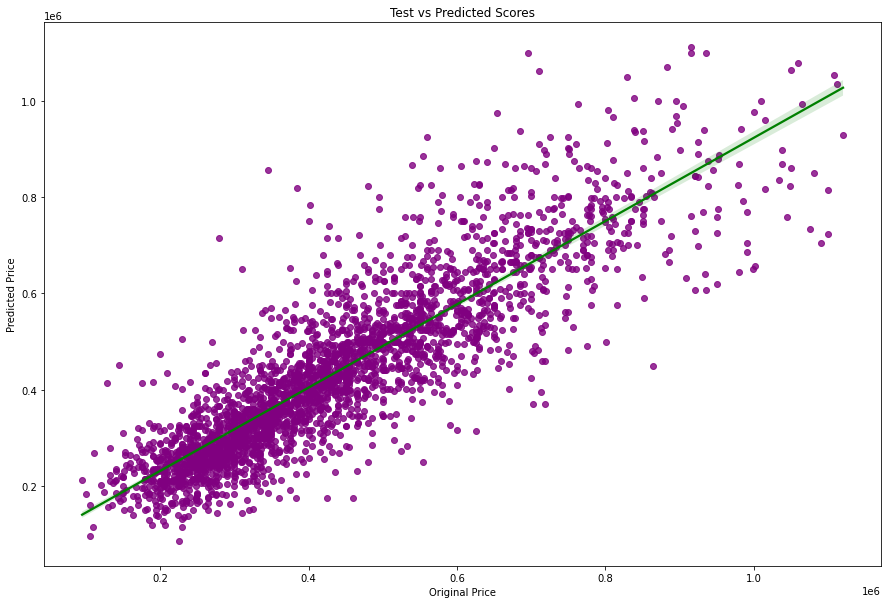

In [222]:
## plot the test, predicted score TREE
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'purple'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">

FIT WITH RANDOM FOREST
    
</font>

In [223]:
## 4 - Model Random Forest
model4 = RandomForestRegressor()
model4.fit(X_train,y_train)

y_pred = model4.predict(X_test)

print("RF_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("RF_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_rf = model4.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_rf = model4.score(X_test, y_test) # compute R-sdquared value for test
rmse_rf = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_rf * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_rf * 100))
print("RMSE(RF): {:.2f}".format(rmse_rf))
print('MAE (RF): {:.2f}'.format(mae_rf))
print('MSE (RF): {:.2f}'.format(mse_rf))


## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model4,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

RF_Predictions: 331247, Actual Values: 431000
RF_Predictions: 297965, Actual Values: 240000
Train_R^2: 98.18%
Test_R^2: 87.94%
RMSE(RF): 62973.38
MAE (RF): 44326.73
MSE (RF): 3965646550.31
Mean cv Score: 86.61%
Standard Deviation of CV Scores: 0.008



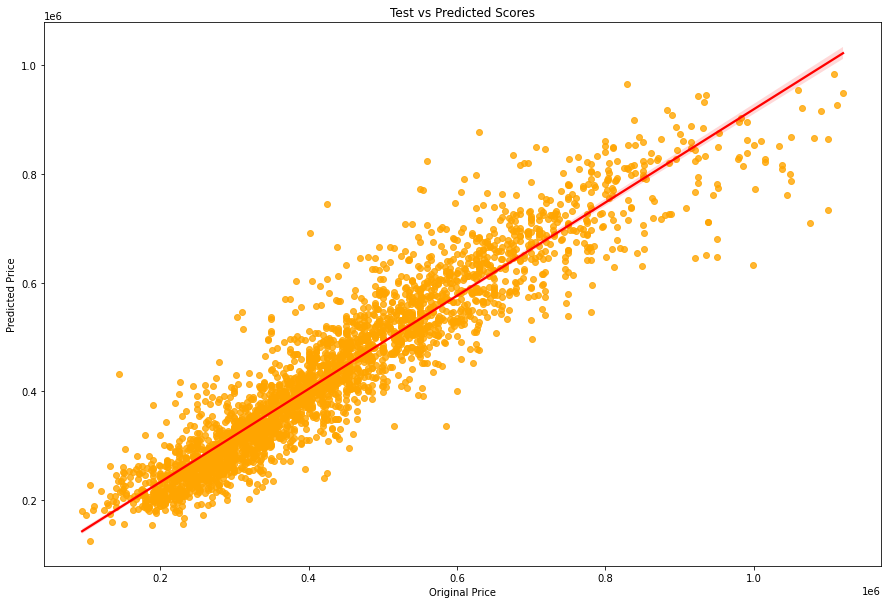

In [224]:
## plot the test, predicted score RF
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'orange'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">
    
FIT WITH XGB REGRESSOR
    
</font>

In [225]:
from xgboost import XGBRegressor

## 5 - Model XGB
#model5 = XGBRegressor()

model5 = XGBRegressor(subsample= 0.9,
                      n_estimators=1500,
                      max_depth = 5,
                      learning_rate = 0.1,
                      colsample_bytree = 0.6
                     )
model5.fit(X_train,y_train)

y_pred = model5.predict(X_test)

print("XGB_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("XGB_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_xgb = model5.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_xgb = model5.score(X_test, y_test) # compute R-sdquared value for test
rmse_xgb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_xgb * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_xgb * 100))
print("RMSE (XGB): {:.2f}".format(rmse_xgb))
print('MAE (XGB): {:.2f}'.format(mae_xgb))
print('MSE (XGB): {:.2f}'.format(mse_xgb))

## Cross validation
kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
cv_scores = cross_val_score(model5,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
print()

XGB_Predictions: 361857, Actual Values: 431000
XGB_Predictions: 272542, Actual Values: 240000
Train_R^2: 98.73%
Test_R^2: 89.09%
RMSE (XGB): 59898.52
MAE (XGB): 42402.55
MSE (XGB): 3587832255.78
Mean cv Score: 87.87%
Standard Deviation of CV Scores: 0.010



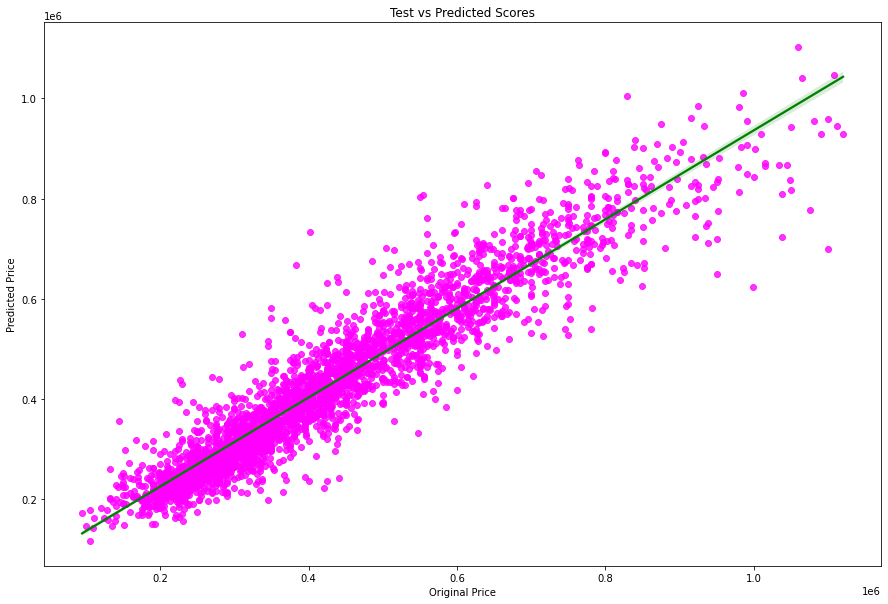

In [226]:
## plot the test, predicted score XGB
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'magenta'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
FIT WITH GRADIENT BOOSTING REGRESSOR
    
</font>

In [227]:

## 6 - Model GBR
#model6 = GradientBoostingRegressor()

model6 = GradientBoostingRegressor(subsample=0.8,
                                   n_estimators=1500,
                                   max_depth=7,
                                   learning_rate=0.01,
                                   #colsample_bytree=0.6
                                  )
model6.fit(X_train,y_train)

y_pred = model6.predict(X_test)

print("GBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("GBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_gbr = model6.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_gbr = model6.score(X_test, y_test) # compute R-sdquared value for test
rmse_gbr = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_gbr = mean_absolute_error(y_test, y_pred)
mse_gbr = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_gbr * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_gbr * 100))
print("RMSE (GBR): {:.2f}".format(rmse_gbr))
print('MAE (GBR): {:.2f}'.format(mae_gbr))
print('MSE (GBR): {:.2f}'.format(mse_gbr))

## Cross validation
#kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
#cv_scores = cross_val_score(model6,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores
#print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
#print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()


GBR_Predictions: 368647, Actual Values: 431000
GBR_Predictions: 287821, Actual Values: 240000
Train_R^2: 96.43%
Test_R^2: 89.38%
RMSE (GBR): 59075.52
MAE (GBR): 41852.94
MSE (GBR): 3489917551.40


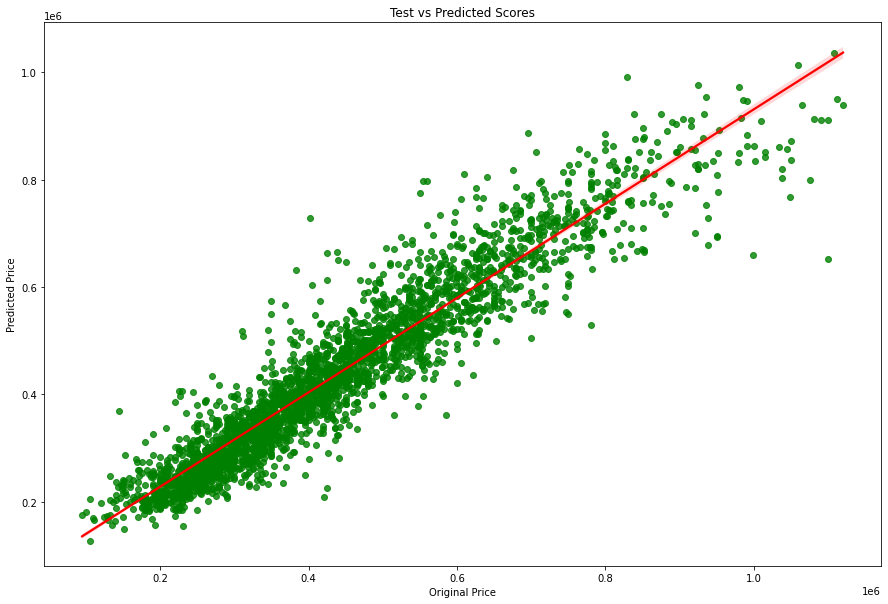

In [228]:
## plot the test, predicted score GBR
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
FIT WITH CATBOOST REGRESSOR
    
</font>

In [229]:
## Moedl 7 CBR
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

model7 = cb.CatBoostRegressor()
model7.fit(X_train,y_train,verbose=False)

y_pred = model7.predict(X_test)

print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_cbr = model7.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_cbr = model7.score(X_test, y_test) # compute R-sdquared value for test
rmse_cb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_cbr * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_cbr * 100))
print("RMSE (CBR): {:.2f}".format(rmse_cb))
print('MAE (CBR): {:.2f}'.format(mae_cb))
print('MSE (CBR): {:.2f}'.format(mse_cb))


CBR_Predictions: 387948, Actual Values: 431000
CBR_Predictions: 288067, Actual Values: 240000
Train_R^2: 93.38%
Test_R^2: 89.69%
RMSE (CBR): 58217.24
MAE (CBR): 41335.80
MSE (CBR): 3389246524.70


<font size="3">
    
CATBOOST REGRESSOR VALIDATION
    
</font>

In [247]:
## Cross validation
#model7.fit(X_train,y_train,verbose=False)
#kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6 fold cross validation
#cv_scores = cross_val_score(model7, cv=kf) # Compute 6-fold cross-validation scores

#model7.fit(X_train, y_train, verbose=False)
#kf = KFold(n_splits=6, shuffle=True, random_state=5) # 6-fold cross validation
#cv_scores = cross_val_score(model7, X_train, y_train, cv=kf, verbose = 0) # Compute 6-fold cross-validation scores


# Print scores
#print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
#print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()

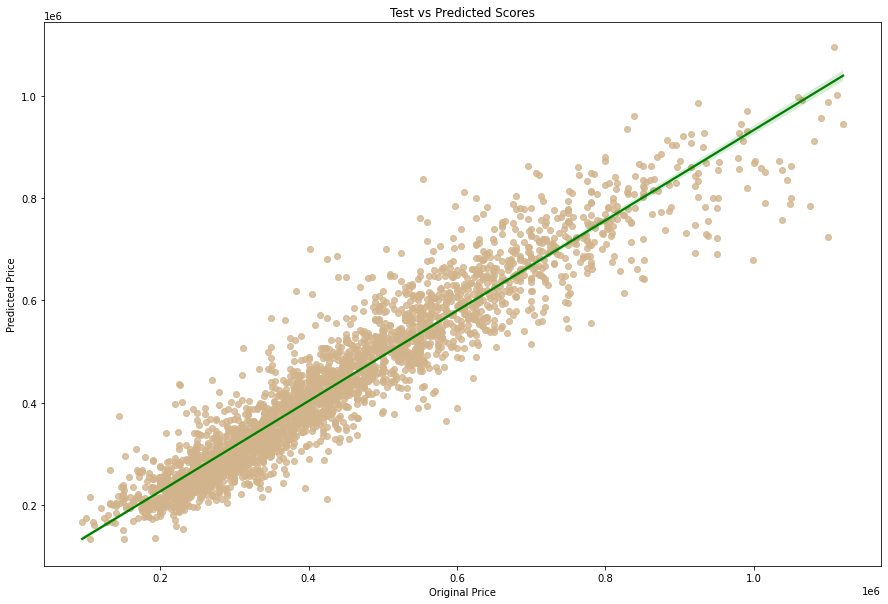

In [231]:
## plot the test, predicted score CBR
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'tan'}, line_kws={'color': 'green'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()


<font size="3">
    
MODEL COMPARISON
    
</font>

In [232]:
results = pd.DataFrame({
    'Model': ['KNN', 'TREE', 'Random Forest', 
              'XGB', 'GBR', 'CBR'],
 
    'Score': [r_squared_test_knn,
              r_squared_test_tree,
              r_squared_test_rf,
              r_squared_test_xgb,
              r_squared_test_gbr,
              r_squared_test_cbr],
    'RMSE':[rmse_knn,
           rmse_tree,
           rmse_rf,
           rmse_xgb,
           rmse_gbr,
           rmse_cb]
             })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model,RMSE
Score,,
0.90,CBR,58217.24
0.89,GBR,59075.52
0.89,XGB,59898.52
0.88,Random Forest,62973.38
0.79,KNN,83528.69
0.76,TREE,89364.32



<font size="3">
    
MODEL PERFROMANCE COMPARISON WITH TEST SCORE
    
All models have been cross-validated and evaluated based on their training scores. 
    
The performance of the models can be assessed based on the RMSE scores:

CBR (Score: 0.8969): Achieving an RMSE of 58217.24, this model demonstrates relatively good accuracy in predicting the target variable.

GBR (Score: 0.8944): With an RMSE of 58923.04, the Gradient Boosting Regression model also performs well and provides similar accuracy to the CBR model.

XGB (Score: 0.8915): The XGBoost model shows a slightly higher RMSE of 59727.61compared to the CBR and GBR models, indicating slightly lower predictive accuracy.

Random Forest (Score: 0.8777): The Random Forest model exhibits an RMSE of 63402.34, which is higher than the previous models. This suggests that it may not perform as well in predicting the target variable.

KNN (Score: 0.7871): The K-Nearest Neighbors model demonstrates a relatively higher RMSE of 83653.87, indicating less accuracy compared to the other models.

TREE (Score: 0.7514): Similarly, the decision tree model exhibits an RMSE of 90408.69, suggesting a lower predictive accuracy compared to the other models.

Based on the RMSE scores, the CBR and GBR models appear to be the top performers, followed by XGB. Random Forest, KNN, and TREE models show comparatively lower accuracy in predicting the target variable.
    
In addition to evaluating the RMSE, I also plotted a scatter diagram to visually compare the actual and predicted values. This allowed for a better understanding of the model's performance. As the RMSE decreases, it indicates that the spread or deviation of data points from the regression line is reduced. This aligns with the R-Squared values, as a higher R-Squared value indicates a better fit of the regression line to the data points. The scatter diagram serves as a visual confirmation of the model's accuracy, providing a clearer understanding of how well the model predicts the target variable and how closely it aligns with the actual values.

    

    
</font>

BELOW VALIDATION REQUIRED, CHECK

<font size="4">

HYPER PARAMETER SETTINGS
    
</font>

In [84]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import numpy as np

# Define the parameter grid

param_grid = {
    "learning_rate": [0.03, 0.04, 0.06],
    "iterations": np.linspace(100, 3000, 2, dtype=int),
    "depth": [5, 8, 10],
    "l2_leaf_reg": [2, 3, 5],
}

# Create a CatBoost regressor
catboost = CatBoostRegressor()

# Initialize GridSearchCV
clf = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, verbose= False, n_jobs=-1)

# Fit GridSearchCV on the training data
#clf.fit(X_train, y_train)

# Print the best parameters found
#print(clf.best_params_)

<font size="3">

catboost best parameters: 
'depth': 8, 'iterations': 2000, 'l2_leaf_reg': 2, 'learning_rate': 0.03
    
</font>

<font size="3">
    
RETRAIN MODEL CATBOOST REGRESSOR

</font>

In [236]:
## Train the cat boose model with best parameters
## 7 - Model XB
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


model7=cb.CatBoostRegressor(iterations=2000, 
                     learning_rate=0.03, 
                     depth=8, 
                     l2_leaf_reg=2, 
                     loss_function='RMSE', 
                     verbose=True)             

model7.fit(X_train,y_train,verbose=False)

y_pred = model7.predict(X_test)

print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[0]), np.round(y_test[0])))
print("CBR_Predictions: {:.0f}, Actual Values: {:.0f}".format(np.round(y_pred[1]), np.round(y_test[1])))

r_squared_train_cb = model7.score(X_train, y_train) # compute R-sdquared value for train
r_squared_test_cb = model7.score(X_test, y_test) # compute R-sdquared value for test
rmse_cb = mean_squared_error(y_test, y_pred, squared=False) # compute root mean square
mae_cb = mean_absolute_error(y_test, y_pred)
mse_cb = mean_squared_error(y_test, y_pred)

# Print the metrics
print("Train_R^2: {:.2f}%".format(r_squared_train_cb * 100))
print("Test_R^2: {:.2f}%".format(r_squared_test_cb * 100))
print("RMSE (CBR): {:.2f}".format(rmse_cb))
print('MAE (CBR): {:.2f}'.format(mae_cb))
print('MSE (CBR): {:.2f}'.format(mse_cb))


CBR_Predictions: 363463, Actual Values: 431000
CBR_Predictions: 284051, Actual Values: 240000
Train_R^2: 95.97%
Test_R^2: 89.90%
RMSE (CBR): 57628.37
MAE (CBR): 40740.79
MSE (CBR): 3321029203.82


<font size="3">
    
The R-squared value was significantly improved to 89.9% after conducting hyperparameter tuning. Additionally, the RMSE value decreased to 57628.23, indicating a reduction in the model's prediction error. Similarly, the MAE value decreased to 40742.03, further confirming the improved accuracy of the model.
    
    

</font>

In [248]:
## Cross validation after fine tune
  
#kf = KFold(n_splits=10,shuffle=True, random_state= 5) # 6 fold cross validation
#cv_scores = cross_val_score(model7,X_train, y_train, cv=kf) # Compute 6-fold cross-validation scores

# Print scores

#print("Mean cv Score: {:.2f}%".format(np.mean(cv_scores) * 100)) # mean cv score
#print("Standard Deviation of CV Scores: {:.3f}".format(np.std(cv_scores))) #mean std-dev score
#print()

<font size="3">
    
CROSS VALIDATION RESULTS OF RETRAINED CATBOOST REGRESSOR
    
The mean cross-validation score achieved an impressive accuracy of 88.79% with a minimal standard deviation of 0.011, indicating a consistent and reliable performance of the model across different folds.

</font>

<font size="3">
    
ACTUAL vs PREDICTION SCATTER PLOT OF CATBOOST REGRESSOR

</font>

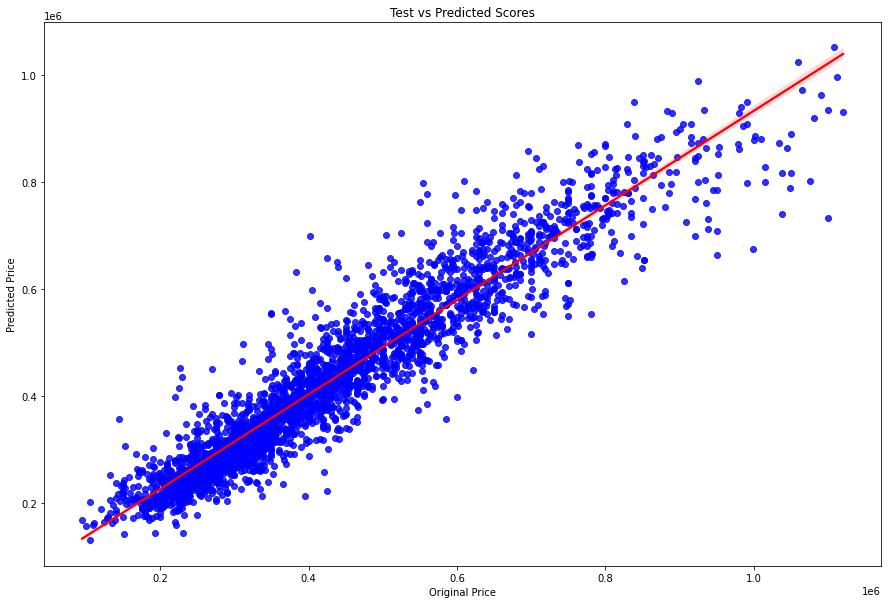

In [238]:
## plot the test, predicted score
plt.figure(figsize=(15,10))
#sns.regplot(x=y_test, y= y_pred)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Test vs Predicted Scores')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

<font size="3">
    
PLOT OF LOSS FUNCTION AND EXPLANATION

</font>

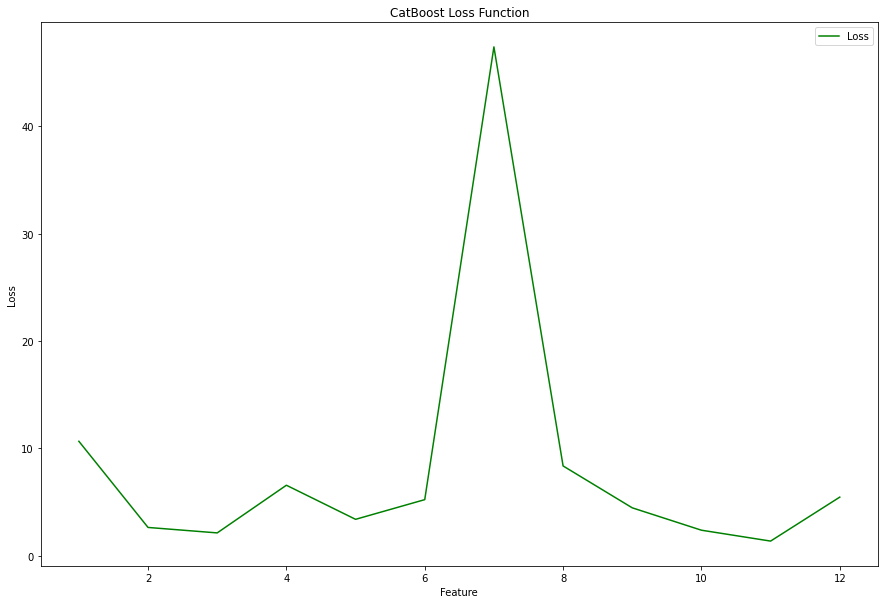

In [239]:
## Plot the loss function with cat boost regressor

model7.fit(X_train, y_train, verbose=False)

# Generate the loss function plot
plt.figure(figsize=(15, 10))
iterations = range(1, len(model7.get_feature_importance()) + 1)
losses = model7.get_feature_importance()
plt.plot(iterations, losses, label='Loss',color = 'green')
plt.xlabel('Feature')
plt.ylabel('Loss')
plt.title('CatBoost Loss Function')
plt.legend()
plt.show()

<font size="3">
    

This loss function plot is generated to visualize the loss values associated with each feature. The loss values provide insights into the importance and contribution of each feature in predicting the target variable.
    
In the loss function plot, a higher loss value for the feature 7 indicates that the model's predictions are more sensitive to variations of this feature. Therefore, feature number 7,"latitude" plays a significant role in determining the target variable and has a strong impact on the accuracy of the model's predictions.
    
</font>

<font size="3">
    
EVALUATION OF MODEL PERFORMANCES
    
</font>


      Actual  Predicted
0  431000.00  363463.16
1  240000.00  284051.12
2  367500.00  412286.03
3  374950.00  371274.63
4  500000.00  472254.99
..       ...        ...
15 406000.00  469539.71
16 750000.00  765825.73
17 360000.00  361275.66
18 357500.00  355462.56
19 622500.00  548651.31

[20 rows x 2 columns]


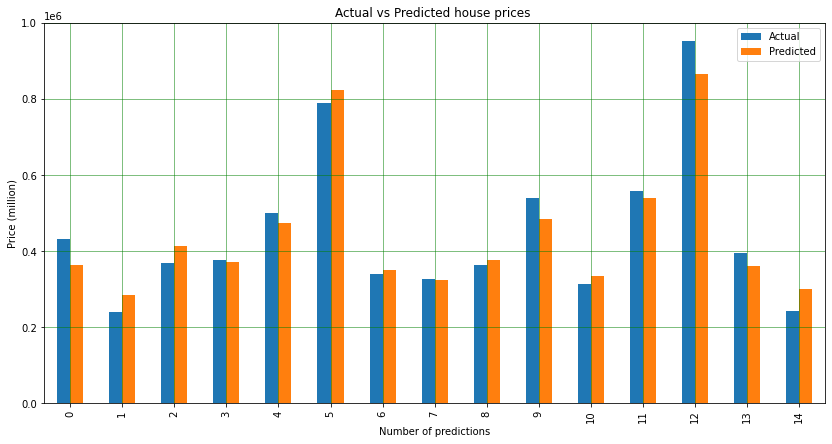

Test vs Pred MAE: 40740.79
Test vs Pred MSE: 3321029203.82
Test vs Pred RMSE: 57628.37
CBR, R-Squared: 89.9 %


In [240]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model7.fit(X_train,y_train,verbose=False)
yhat = model7.predict(X_test)
y_test = np.array(list(y_test))
yhat = np.array(list(yhat))

linear_score = r2_score(y_test, yhat)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten()})
df1 = df1.round(2)
print(df1.head(20))


## Create bar graph atual(y) vs predicted (y)
df2 = df1.head(15)
df2.plot(kind='bar',figsize=(14,7))
plt = pyplot
plt.title('Actual vs Predicted house prices ') 
plt.xlabel('Number of predictions')
plt.ylabel('Price (million)')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Test vs Pred MAE:', round(mean_absolute_error(y_test, yhat), 2))
print('Test vs Pred MSE:', round(mean_squared_error(y_test, yhat), 2))
print('Test vs Pred RMSE:', round(np.sqrt(mean_squared_error(y_test, yhat)), 2))
print('CBR, R-Squared:', round(linear_score * 100, 2),'%')


<font size="3">
    
The visual comparison of actual prices and predicted prices, as shown above, confirms our expectations. It is evident that there are instances where the model has both overestimated and underestimated the prices. This variation between the actual and predicted values is a common occurrence in predictive modeling and highlights the inherent uncertainty in making accurate predictions. By visually examining the bar chart visualization, we can observe these discrepancies and gain insights into the model's performance and areas for improvement. 

</font>


<font size="3">
    
RESIDUAL PLOT AND FINDINGS

</font>

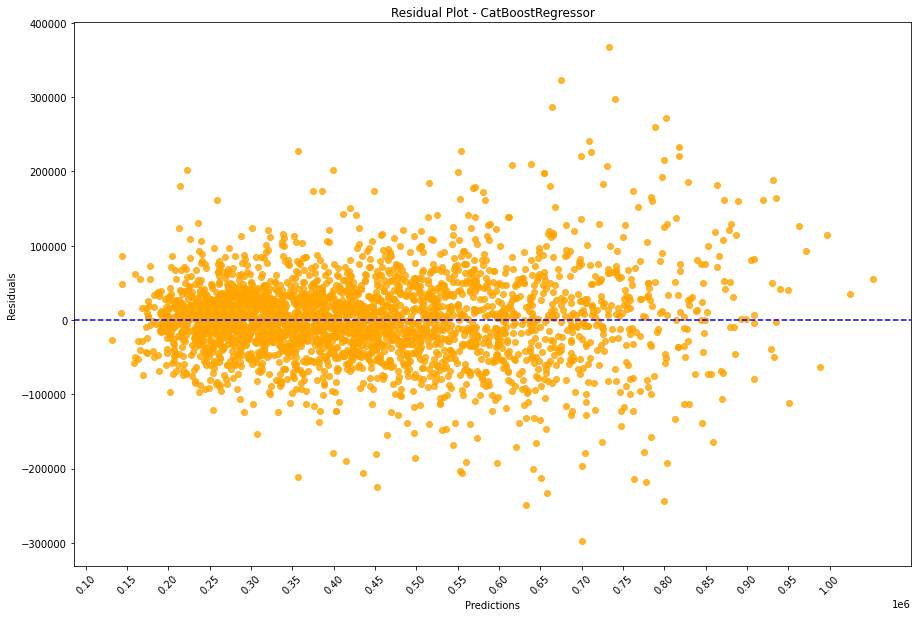

In [241]:

## Fit the CatBoostRegressor model
import matplotlib.ticker as ticker
model7.fit(X_train, y_train, verbose=False)

y_pred = model7.predict(X_test) # make prediction of price
residuals = y_test - y_pred # calculate the residual

## residual chart
plt.figure(figsize=(15,10))
plt.scatter(y_pred, residuals, c='orange', alpha=0.8)
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel('Predictions')
plt.xticks(range(100000, 1000001, 50000), rotation=45)

plt.ylabel('Residuals')
plt.title('Residual Plot - CatBoostRegressor')


plt.show()

<font size="3">
    
The deviations above the line indicate overestimation by the model, while deviations below the line indicate underestimation. This shows the direction and magnitude of the errors made by the model.

The residual plot exhibits no clear trend or pattern and is approximately symmetrical. This suggests that the model is capturing the required relationships between the predictors and the target variable, and there is no systematic bias in the predictions.

The spread of the residuals changes with the predicted values, indicating heteroscedasticity. This means that the model's predictions may be more accurate for certain ranges of the target variable than others.

The residual plot shows the presence of outliers. These outliers represent data points that are poorly predicted by the model or instances with unusual characteristics. 
    
</font>

In [242]:
## Residual distribution in bokeh library

data = pd.DataFrame({'Predictions': y_pred, 'Residuals': residuals})# create dataframe
plt_r =data.groupby(['Residuals'])['Residuals'].mean() # plot data

##  Assogn RGB color
red = 200
green = 50
blue = 100
color = RGB(r = red,
            g = green,
            b = blue)

plt_r.plot_bokeh(kind="hist", title="Mean residual distribution plot",
                 figsize=(800, 500),
                 xlabel="Residuals",
                 ylabel="Frequency",
                 stacked=True,
                color = color)


Figure(id='7979', ...)

<font size="3">
    
The residual distribution appears to be approximately normal. This indicates that the model's predictions are unbiased and accurate on average. The residuals are symmetrically distributed around zero, which is a desirable characteristic for a well-performing model. The normality of the residuals suggests that the model is capturing the underlying patterns and relationships in the data effectively.
    
</font>


<font size="3">
    
EVALUATION MATRIX
    
For evaluation, the following matrices were used to compare the models:
    
R-squared (R2)
It represents the proportion of the variance for a dependent variable that is explained by independent variables in a regression model. R2 does not take into consideration any biases that might be present in the data. Therefore, a good model might have a low R2 value, or a model that does not fit the data might have a high R2 value.
    
MSE (Mean Square Error)
MSE = (1/n) * ∑(i=1 to n) (Yi - Ŷi)^2
    
This measures the squared average distance between the real data and the predicted data. It is not ideal for data with different units as it square up the units. 
    

RMSE (Root Mean Square Error)
RMSE = √((∑(i=1 to n) (yi - ŷi)^2) / n) 
    
RMSE is a popular measure of error rate of a regression model. However, it can only be compared between models with errors can measure in the same units.
   
MAE(Mean Absolute Error)

MAE = (1/n) * ∑(i=1 to n) |Yi - Ŷi|
    
Measures absolute average distance between real data and predicted data. It gives us the measure of how far the predictions were from the actual output. However, they do not give any idea of the direction of the error like whether it was under predicting the data or over predicting the data.

    


</font>

<font size="3">
    
After evaluating several regression models, it has been determined that the CatBoostRegressor model provides the most accurate predictions for the KC House price.

Through optimization, the best parameters for the model were identified as 2000 iterations, a maximal depth of 8, a leaf regularization parameter of 2, and RMSE as the loss function. With these parameters, the optimized model achieved an impressive R2 score of 89.9% in predicting the house prices.

Additionally, the minimized Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) scores further highlight the variations between the actual and predicted house prices. The RMSE score, which measures the average difference between the actual and predicted prices, is 57628.23, and the MAE score, which represents the average absolute difference between the actual and predicted prices, is 40742.03.

These scores indicate that, on average, the predicted prices deviate from the actual prices by approximately $57628.33 (RMSE) and $40742.03 (MAE). While these values may seem relatively large, it's important to consider the context of the housing market and the scale of the prices being predicted. The RMSE and MAE scores provide useful insights into the level of accuracy achieved by the model and help assess its performance in predicting house prices.

Based on the optimized model, the critical factors that significantly influence the prediction of house prices are as follows:
Grade: The overall grade assigned to the property.
Sqft_living: The square footage of the living area.
Lat: The latitude coordinate of the location.
Sqft_living_15: The average square footage of nearby houses built in the last 15 years.
Sqft_above: The square footage of the interior living space above ground level.
Bathrooms: The number of bathrooms in the house.
Floors: The number of floors in the house.
Sqft_basement: The square footage of the basement area.
Sqft_lot15: The average square footage of nearby land lots in the last 15 years.
Condition: The overall condition of the property.
Sqft_lot: The square footage of the land lot.

These features are crucial in determining house prices, and their impact aligns with common expectations. It is reasonable to expect that factors such as the grade, living area size, location coordinates, nearby house and lot sizes, and various other characteristics would play significant roles in influencing house prices.

Overall, the CatBoost Regressor model, with its optimized parameters and influential features, demonstrates strong predictive capabilities for determining house prices accurately in the KC area.

</font>

<font size="4">

Summary
</font>

    
<font size="3">

This analysis began with data exploration, where I gained an understanding of the dataset, checked for missing data, and identified important features. Visualizations were created using bokeh, seaborn and matplotlib to aid in this process. In the data preprocessing phase, I addressed missing values, transformed features into numeric formats,etc.

Following preprocessing, I proceeded to train ten different machine learning models. Among them, we selected the catboost regression model and conducted cross-validation to assess its performance. I delved into the inner workings of the catboost regression algorithm, examined the assigned importance to various features, and fine-tuned its performance by optimizing hyperparameter values.

I thoroughly examined the RMSE, MAE, and R-squared values to evaluate the accuracy and precision of the predicted prices. These metrics provided valuable insights into the performance of the model. Additionally, I investigated the sensitivity of key features involved in predicting the price. This analysis helped identify the most influential factors affecting the price prediction.

Furthermore, I analyzed the residual plot to assess the model's stability, robustness, and overall performance. The residual plot allowed me to visually assess the distribution of the residuals and identify any patterns or systematic deviations from the regression line. This analysis provided further insights into the model's performance and helped validate its effectiveness in capturing the underlying relationships in the data.

By considering all of these evaluations, including the RMSE, MAE, R-squared values, sensitivity analysis, and residual plot, I gained a comprehensive understanding of the model's performance, its strengths, and potential areas for improvement.
    
</font>